In [1]:
%matplotlib inline
from vj_processing import *
from IPython.display import clear_output
pixmapfile = '../data/PixelMaps/Storage/PixelMaps/K2_target_pixels.hdf5'

In [2]:
#get_lc_url(EPIC, 8)
K2FOV.Field.get_channels(16)
from matplotlib.pyplot import savefig

https://archive.stsci.edu/missions/k2/lightcurves/c8/220200000/89355/ktwo220289355-c08_llc.fits
https://archive.stsci.edu/missions/k2/lightcurves/c8/220200000/89000/ktwo220289355-c08_llc.fits

308
True
2.38418579102e-05
Running Pipeline
Extracting Photometry
Normalizing
Computing Positions


/home/rodot/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rodot/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


308


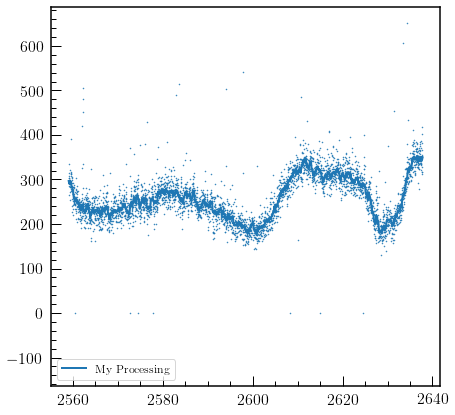

In [3]:
#ccd = CCD(campaign=8, field='FLUX', channel=2, module=6)
#cont = load_pixel_map(ccd)
#gen=PixMapGenerator(cont, cache=True)


# module 6, channel 2 {
EPIC = 220282234
EPIC = 220268684 # Faint object (~19th magnitude) AGN with massive trends
EPIC = 220284690 #ditto
#EPIC = 220289355 # ditto again
module = 6
channel = 2
campaign = 8
field='FLUX'
# }
'''
# The standard Star {
EPIC = 220210778
channel = 0
campaign = 8
module = 22
field = "FLUX"
# }
# One with Planets {
EPIC = 220250254
channel = 3
module = 12
campaign = 8
field = 'FLUX'
# }
# Another {

EPIC = 220186645
channel = 1
module = 16
campaign = 8
# }
'''
# The standard Star {
#EPIC = 220210778
#channel = K2FOV.Field.get_channels(22).index(73)
#campaign = 8
#module = 22
#field = "FLUX"
# }
'''
# A Variable Star {
EPIC = 220168802
campaign = 8
channel = 2
module = 16
field = 'FLUX'
# }
'''
'''
# A Cepheid Variable{
EPIC = 229228839
EPIC = 229228820 # Lower Periodicity
#EPIC = 229228821 # Higher Periodicity
#EPIC = 229228827 # Mid Periodicity, showing some trends
#EPIC = 229228829 # more periodic, small possible trends
#EPIC = 229228854
#EPIC = 229228846
#EPIC = 229228822
#EPIC = 229228844
module = 17
channel = K2FOV.Field.get_channels(module).index(58)
field = 'FLUX'
#'''
'''
EPIC = 229228842
module = 17
channel = K2FOV.Field.get_channels(module).index(58)
field = 'FLUX'
#}
'''
ccd = CCD(campaign=campaign, field=field, channel=channel, module=module)
#with LoadingBar(True) as bar:
#    cont = PixelMapContainer(ccd, bar=bar)
#    cont.save(pixmapfile, doc='Pixel values are represented by the \'FLUX\' data column of the K2 target pixel files')
    
#print len(cont)

cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)

print len(cont)
#print cont.epic_map
#print EPIC in cont.epic_map
cont.exclude_epic(EPIC)

print EPIC in cont.epic_map
gen=PixMapGenerator(cont, cache=True)

T0 = time.time()
#lc = get_pixel_lc(gen, percentiles, (23,11))
print time.time() - T0

pipeline = VJPipeline(EPIC, ccd)
pipeline.download()
pipeline.set_aperture('PRF_APER_TBL',9)
pipeline.run_pipeline()

m = np.nanmean(pipeline.photometry)
s = np.nanstd(pipeline.photometry)
pipeline.compare().set_ylim(m-s*2, m+s*2)
print(len(cont))
N = len(pipeline.images)
originals = [np.nanmean(pipeline.images[:N/2], axis=0), np.nanmean(pipeline.images[N/2:], axis=0)]
print_images(originals[0], originals[1], size=2, cbar=False, scale='log', title='Original', blank_nan=False, vmin=0.0, vmax=4.0);
print_image(originals[1] - originals[0], size=2, cbar=True, scale='symlog', title='Difference', blank_nan=False);
print ""

In [4]:
cont.__doc__

In [5]:
fluxToMag(1000.0)

17.601373120706498

In [ ]:
percentiles = np.linspace(0, 100, 501)
STEP=1
STEP = N/len(percentiles)*(9)/16
SMOOTH=120

percentiles = np.linspace(0, 100, 501)
for campaign in (0,3,9):
    for module in xrange(24):
        for channel in xrange(4):
            ccd = CCD(module=module, channel=channel, field='FLUX', campaign=campaign)
            if os.path.isfile('../plots/c0%i/Module%iChannel%iPixelMapFull.png' % (ccd.campaign, ccd.module, ccd.channel)):
                continue

            #if os.path.isfile('../plots/Module%iChannel%iPixelMapFull.png' % (ccd.module, ccd.channel)):
            #    continue
            try:
                cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
            except:
                try:
                    print "Loading..."
                    with LoadingBar(True) as bar:
                        cont = PixelMapContainer(ccd, bar=bar)
                        cont.save(pixmapfile, doc='Pixel values are represented by the \'FLUX\' data column of the K2 target pixel files')
                except Exception as e:
                        print "Could not load data for CCD: {}".format(ccd)
                        print e
                        continue
            gen = PixMapGenerator(cont, cache=True)
            print "Making", ccd
            lc = get_pixel_lc(gen, percentiles, mag_range=(1,50)) #Star

            args = make_pixel_lc(lc, percentiles, diff=False)
            plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH, title="Median Pixel Light Curves M%i.%i" % (ccd.module, ccd.channel));
            savefig('../plots/c0%i/Module%iChannel%iPixelMapFull.png' % (ccd.campaign, ccd.module, ccd.channel))

            args = make_pixel_lc(lc, percentiles, diff=True)
            plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH, title="Differenced Median Pixel Light Curves M%i.%i" % (ccd.module, ccd.channel));
            savefig('../plots/c0%i/Module%iChannel%iPixelMapDiff.png' % (ccd.campaign, ccd.module, ccd.channel))


Loading...


Could not load data for CCD: CCD(module=0, channel=0, field='FLUX', campaign=0)
list index out of range
Loading...


Could not load data for CCD: CCD(module=0, channel=1, field='FLUX', campaign=0)
list index out of range
Loading...


Could not load data for CCD: CCD(module=0, channel=2, field='FLUX', campaign=0)
[############################################################-] Estimating...list index out of range
Loading...


Could not load data for CCD: CCD(module=0, channel=3, field='FLUX', campaign=0)
list index out of range
Loading...


Could not load data for CCD: CCD(module=1, channel=0, field='FLUX', campaign=0)
list index out of range
Loading...
[############################################################-] Estimating...   

Could not load data for CCD: CCD(module=1, channel=1, field='FLUX', campaign=0)
list index out of range
Loading...

[############################################################-] Estimating...   
Could not load data for CCD: CCD(module=1, chann

/home/rodot/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:137: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


Loading...
[#-..........................................................] Estimating...    
[#/..........................................................] Estimating...    Found 7041 objects from VJ database 
[#\..........................................................] Estimating...    Found 24187 objects from GO_all_campaigns_to_date.csv 
[#-..........................................................] Estimating...    Removed 31171 objects from outside the ccd region 
[##########################################################-.] 0:04 remaining     Writing... (Do Not Turn off Device or Stop Kernel)


[############################################################-] 0:00 remaining  
[############################################################|] 0:04 remaining  
Making CCD(module=2, channel=1, field='FLUX', campaign=0)

[###########################################################\] 0:00 remaining   
Loading...

[#/..........................................................] Estimating...

[#\..........................................................] Estimating...    Found 24187 objects from GO_all_campaigns_to_date.csv 
[#/..........................................................] Estimating...    Removed 31063 objects from outside the ccd region 
[###########################################################\] 0:05 remaining     Writing... (Do Not Turn off Device or Stop Kernel)

[############################################################-] 0:00 remaining  

[############################################################/] 0:04 remaining  
Making CCD(module=6, channel=1, field='FLUX', campaign=0)

[############################################################\] 0:00 remaining  
Loading...

[#/..........................................................] Estimating...    Found 7041 objects from VJ database 
[#-..........................................................] Estimating...    Found 24187 objects from GO_all_campaigns_to_date.csv 
[#/..............................

/home/rodot/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Loading...

[#/..........................................................] Estimating...    Found 7041 objects from VJ database 
[#\..........................................................] Estimating...    Found 24187 objects from GO_all_campaigns_to_date.csv 
[#-..........................................................] Estimating...    Removed 31168 objects from outside the ccd region 
[###########################################################/] 0:05 remaining     Writing... (Do Not Turn off Device or Stop Kernel)
[###########################################################|] 0:05 remaining   


[############################################################\] 0:05 remaining  
Making CCD(module=6, channel=3, field='FLUX', campaign=0)

[############################################################\] 0:00 remaining  
Loading...


Could not load data for CCD: CCD(module=7, channel=0, field='FLUX', campaign=0)
list index out of range
Loading...


Could not load data for CCD: CCD(modul

[############################################################|] 0:00 remaining  
Loading...
[#-..........................................................] Estimating...    
[#/..........................................................] Estimating...    Found 7041 objects from VJ database 
[#\..........................................................] Estimating...    Found 24187 objects from GO_all_campaigns_to_date.csv 
[#-..........................................................] Estimating...    Removed 31140 objects from outside the ccd region 
[###########################################################\] 0:06 remaining     Writing... (Do Not Turn off Device or Stop Kernel)
[###########################################################-] 0:04 remaining   
[############################################################-] 0:00 remaining  

[############################################################/] 0:04 remaining  
Making CCD(module=10, channel=0, field='FLUX', campaign=0)

[######

[#/..........................................................] Estimating...    Removed 31139 objects from outside the ccd region 
[###########################################################\] 0:07 remaining     Writing... (Do Not Turn off Device or Stop Kernel)


[###########################################################-] 0:05 remaining   
[############################################################/] 0:05 remaining  
Making CCD(module=12, channel=1, field='FLUX', campaign=0)

[############################################################\] 0:00 remaining  


In [15]:
def set_tick_sizes(ax):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(26) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(26)

def get_sf(arr):
    
    sf = []
    with LoadingBar(True) as l:
        for i in xrange(len(arr)):
            sf.append(np.var([arr[j:j+i] for j in xrange(i, len(arr)-i)]))
            l.update_bar(1.0*i/len(arr))
    return sf

def plot_pixel_sf(args, title=None, ylim=None, STEP=120, smooth=False):
    
    fig, ax = subplots(1,1, figsize=(16,9*3))
    args = list(args)
    
    image = np.array([y for t,y,_,b in args][::-1])
    image = np.array([get_sf(line) for line in image])
    
    #print image
    if smooth: # This is very very slow
        if smooth is True:
            smooth = 30
        #image[::] = np.array([runningMean(y,120) for y in image])
        image = np.array(runningMean(image.T,smooth,axis=0)).T
    if STEP > 1:
        image = np.array([np.mean(image[:,i:i+STEP], axis=1) for i in xrange(0,image.shape[1],STEP)]).T
        
    col, row = image.shape
    t = 0.02043229*np.arange(N)+2559.06849083

    #cmap = rplot.palettable.colorbrewer.diverging.BrBG_11.mpl_colormap
    cmap = rplot.palettable.cubehelix.perceptual_rainbow_16.mpl_colormap
    if ylim is not None:
        im = ax.imshow(image, cmap=cmap, vmin=ylim[0], vmax=ylim[1], aspect='auto')
        cbar=fig.colorbar(im, ticks=np.linspace(ylim[0],ylim[1], 1+(ylim[1]-ylim[0])))
    else:
        im = ax.imshow(image, cmap=cmap, aspect='auto')
        cbar = fig.colorbar(im)
    if title is not None:
        ax.set_title(title)
    

        
    ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+1, 20))
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: int((col-1-y)*100/col+0.5)))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x*1.0/row*N*0.02043229+2559.06849083)))
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentile')
    #print ax.get_ylim()
    
    if args[0][3] is not None:
        #bins = np.array([bins for _,_,_,bins in args][::-1])
        means = np.array([m for m in _, y, _, _ in args ])
        #print bins.shape
        #axis_labels = ["{:.2f}".format(i) for i in fluxToMag(np.mean(bins, axis=1))[::-1]]
        axis_labels = ["{:.2f}".format(i) for i in fluxToMag(np.mean(means, axis=1))]
        #print axis_labels
        #ax.tick_params(labelbottom='on',labeltop='off', labelleft="on", 
        #    top='off', left='on', right='off')
        #ax2 = fig.add_axes(ax.get_position(), frameon=False)
        ax2 = ax.twinx()
        ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+1, 20))
        #print axis_labels
        ax2.set_yticklabels(axis_labels[int(i+0.5)] for i in np.linspace(0, len(axis_labels), 20, endpoint=False))
        #ax2.tick_params(labelbottom='off',labeltop='off', labelleft="off", labelright='on',
        #    bottom='off', left='off', right='on', which='both')
        
        #ax2.set_ylim(ax.get_ylim())
        #ax2.set_xlim(ax.get_xlim())
        #plt.draw()
        #ax2.set_position(ax.get_position())
        #plt.draw()
        #print axis_labels
        ax.autoscale(False)
        ax2.autoscale(False)
        def formatter(x, pos):
            #print x
            if pos is None:
                return ''
            idx = int(x*len(axis_labels)/(ax2.get_ybound()[1]+1)+0.5)
            if idx >= len(axis_labels) or idx < 0:
                return ''
            if np.isnan(axis_labels[idx]):
                return 'NaN'
            #print "{:.2f}".format(axis_labels[idx])
            return "{:.1f}".format(axis_labels[idx])
        #ax2.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
        #ax2.yaxis.set_label_position("right")
        #ax2.set_ylim(ax.get_ylim())
        #ax2.set_ylim(axis_labels[0], axis_labels[-1])
        #ax2.yaxis.set_view_interval(axis_labels[0], axis_labels[-1])
        #ax2.set_adjustable('box-forced')
        #plt.draw()
        
        #print "ax2:",ax2.get_ylim()
        #print "ax: ",ax.get_ylim()
        #ax2.set_ylabel('Kep Mag')
    
    return image


def plot_pixel_image(args, title=None, ylim=None, STEP=120, smooth=False):
    
    
    import matplotlib.pyplot as plt
    fig, ax = subplots(1,1, figsize=(16,9))
    args = list(args)
    
    image = np.array([y for t,y,_,b in args][::-1])
    N = image.shape[1]
    
    #print image
    if smooth: # This is very very slow
        if smooth is True:
            smooth = 30
        #image[::] = np.array([runningMean(y,120) for y in image])
        image = np.array(runningMean(image.T,smooth,axis=0)).T
    if STEP > 1:
        image = np.array([np.mean(image[:,i:i+STEP], axis=1) for i in xrange(0,image.shape[1],STEP)]).T
        
    col, row = image.shape
    t = 0.02043229*np.arange(N)+2559.06849083

    #cmap = rplot.palettable.colorbrewer.diverging.BrBG_11.mpl_colormap
    cmap = rplot.palettable.cubehelix.perceptual_rainbow_16.mpl_colormap
    cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap
    if ylim is not None:
        im = ax.imshow(image, cmap=cmap, vmin=ylim[0], vmax=ylim[1], aspect='auto')
        cbar=fig.colorbar(im, ticks=np.linspace(ylim[0],ylim[1], 1+(ylim[1]-ylim[0])), pad=0.1)
    else:
        im = ax.imshow(image, cmap=cmap, aspect='auto')
        cbar = fig.colorbar(im, pad=0.16)
    if title is not None:
        ax.set_title(title, fontsize=30)
    

        
    ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+1, 10))
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: int((col-1-y)*100/col+0.5)))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x*1.0/row*N*0.02043229+2559.06849083)))
    
    ax.set_xlabel('Date', fontsize=24)
    ax.set_ylabel('Percentile', fontsize=24)
    #print ax.get_ylim()
    
    if args[0][3] is not None:
        bins = np.array([bins for _,_,_,bins in args][::-1])
        #print bins.shape
        axis_labels = ["{:.2f}".format(i) for i in fluxToMag(np.mean(bins, axis=1))[::-1]]
        #print axis_labels
        #ax.tick_params(labelbottom='on',labeltop='off', labelleft="on", 
        #    top='off', left='on', right='off')
        #ax2 = fig.add_axes(ax.get_position(), frameon=False)
        ax2 = ax.twinx()
        ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+1, 10))
        #print axis_labels
        ax2.set_yticklabels([axis_labels[int(i+0.5)] for i in np.linspace(0, len(axis_labels), 10, endpoint=False)], {'fontsize':26})
        #ax2.tick_params(labelbottom='off',labeltop='off', labelleft="off", labelright='on',
        #    bottom='off', left='off', right='on', which='both')
        
        #ax2.set_ylim(ax.get_ylim())
        #ax2.set_xlim(ax.get_xlim())
        #plt.draw()
        #ax2.set_position(ax.get_position())
        #plt.draw()
        #print axis_labels
        ax.autoscale(False)
        ax2.autoscale(False)
        def formatter(x, pos):
            #print x
            if pos is None:
                return ''
            idx = int(x*len(axis_labels)/(ax2.get_ybound()[1]+1)+0.5)
            if idx >= len(axis_labels) or idx < 0:
                return ''
            if np.isnan(axis_labels[idx]):
                return 'NaN'
            #print "{:.2f}".format(axis_labels[idx])
            return "{:.1f}".format(axis_labels[idx])
        #ax2.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
        #ax2.yaxis.set_label_position("right")
        #ax2.set_ylim(ax.get_ylim())
        #ax2.set_ylim(axis_labels[0], axis_labels[-1])
        #ax2.yaxis.set_view_interval(axis_labels[0], axis_labels[-1])
        #ax2.set_adjustable('box-forced')
        #plt.draw()
        
        #print "ax2:",ax2.get_ylim()
        #print "ax: ",ax.get_ylim()
        #ax2.set_ylabel('Kep Mag')
        
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(24) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(24) 
        
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(24) 

    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(24) 
    
   
    return image

def make_pixel_lc(lc, percentiles, stat='median', diff=False, med_norm=False):

    N = lc.shape[0]
    t = 0.02043229*np.arange(N)+2559.06849083
    bins = np.array(zip(percentiles[:-1], percentiles[1:]))
    bins = filter(lambda x: None not in x, bins) # for percentiles containing Nones
    idx = {'var':2, 'median':3, 'mean':4}[stat]
    stat = np.empty((2,)) # so we can keep track of the median magnitudes between percentiles
    y = np.empty((N,))
    
    for i,b in enumerate(bins):
        y[::] = lc[:,i,idx]
        stat[::] = [np.nanmedian(lc[:,i,0]),np.nanmedian(lc[:,i,1])]
        
        if diff and i:
            y[::] -= lc[:,i-1,idx]
            stat[::] = np.nanmean([stat,[np.nanmedian(lc[:,i-1,0]),np.nanmedian(lc[:,i-1,1])]], axis=0)

        if med_norm: # divide out by mean
            y[::] /= np.nanmedian(y)
        else:
            med = np.nanmedian(y)
            std = np.nanstd(y)
            y[::] = (y-med)/std
        
        label = '{:.2f}\% to {:.2f}\%, KepMag: {:.2f} to {:.2f}'.format(*(tuple(b)+tuple(fluxToMag(stat))))
        yield t,copy(y),label,copy(stat)
    

In [7]:
#print len(t[np.in1d(t, vj_t)])
flux = pipeline.pix['TARGETTABLES'].data['FLUX']
bkg = pipeline.pix['TARGETTABLES'].data['FLUX_BKG']
low = fluxToMag(np.nanmin(flux))
high = fluxToMag(np.nanmax(flux))

print low, high

nan 17.8383950545


k2utils.py:202: RuntimeWarning: invalid value encountered in log10
  return np.log10(flux/1.74e5)/(-0.4)+12


In [10]:
def correct_target_pixel(pixel, index, lc, aperture, max_pix=None, smooth=0, stat=4):
    
    if max_pix is None:
        max_pix = np.inf
    pixel[pixel > max_pix] = max_pix
    #if pixel > max_pix:
    #    pixel = max_pix
    #print "Max Pixel Flux For Correction set to {}".format(max_pix)
    bins = np.concatenate((lc[:,:,0], lc[:,-1:,1]), axis=1)
    
    lc_means = np.copy(lc[:, :, stat])
    if smooth:
        if smooth is True:
            smooth = 60
        lc_means[:] = np.array(runningMean(lc_means.T,smooth,axis=0)).T
    means = np.nanmean(lc_means[:, :], axis=0)
    '''for each cadence'''
    pos = np.digitize(pixel, bins[index]) - 1
    #if pos == 100:
    #    pos -= 1
    pos[pos == lc_means.shape[1]] -= 1
    nearest = lc_means[index, pos]
    mean = means[pos]
    correction = nearest - mean
    corrected = pixel - correction
    
    return corrected, correction, nearest


def correct_target_pixels(EPIC, lc, aperture, max_pix=None, min_pix=None, smooth=0):
    '''
    TODO: Try making the corrections for each pixel in terms of it's mean deviation in it's bin
    i.e. do a scaled correction rather than an additive one, this takes care of binning issue
    correct the target pixels of an object based on the percentiles input
    Could also try using multiple position bins (weightest based on distance) to 
    better estimate pixels near bin boundaries
        more percentiles means better resolution but more noise
        
        We'll do 3 corrections.  First on the raw target pixels, then on
        the VJ and EVEREST light curves
        
        aperture is a mask'''
    
    #percentiles = np.arange(0,100.1,0.1)
    #lc = get_pixel_lc(gen, percentiles)
    hdus = fits_downloader([get_target_pixel_url(EPIC, 8)])
    
    # First we'll do the hard part, target pixel correction
    hdu = hdus.next()
    target_pixels = BasicFitsContainer('PIX',hdu,'FLUX')
    hdu.close()
    del hdu
    if max_pix is None:
        max_pix = np.inf
    if min_pix is None:
        min_pix = -np.inf
    print "Max Pixel Flux For Correction set to {}".format(max_pix)
    print "Min Pixel Flux For Correction set to {}".format(min_pix)
    corrections = np.empty(target_pixels.pixels.shape)
    corrections[::] = 0.0
    corrected_target_pixels = np.empty(target_pixels.pixels.shape)
    corrected_target_pixels[::] = target_pixels.pixels[::]
    N = len(target_pixels.pixels)
    bins = np.concatenate((lc[:,:,0], lc[:,-1:,1]), axis=1)
    #corrected_target_pixels[corrected_target_pixels > max_pix] = max_pix
    corrected_target_pixels[corrected_target_pixels > max_pix] = np.nan
    corrected_target_pixels[corrected_target_pixels < min_pix] = np.nan
    #means = np.nanmean(lc[:, :, 4], axis=0)
    stds = np.nanstd(lc[:, :, 4], axis=0)
    # try out something new here
    #means = np.nanmedian(target_pixels.pixels, axis=0)
    lc_means = np.empty(lc[:, :, 4].shape)
    lc_means[::] = lc[:,:,4]

    nearest_pix = np.empty(corrected_target_pixels.shape)
    nearest_pix[::] = np.nan
    bin_positions = np.empty(corrected_target_pixels.shape)
    bin_positions[::] = np.nan
    bin_lowers = np.empty(corrected_target_pixels.shape)
    bin_lowers[::] = np.nan
    #nearest_pix[:,~aperture] = np.nanmedian(target_pixels.pixels[:,~aperture], axis=1)
    if smooth:
        if smooth is True:
            smooth = 60
        lc_means[:] = np.array(runningMean(lc_means.T,smooth,axis=0)).T
    means = np.nanmean(lc_means, axis=0)
    
    with LoadingBar(True) as lb:
        for i in xrange(N):
            '''for each cadence'''
            mask = (~np.isnan(corrected_target_pixels[i]) & \
                (corrected_target_pixels[i] >= np.min(bins[i])) & \
                (corrected_target_pixels[i] < np.max(bins[i]))
                   )
            positions = np.digitize(corrected_target_pixels[i,mask], bins[i]) - 1
            nearest = lc_means[i, positions]
            mean = means[positions]
            #std = stds[positions]
            bin_positions[i, mask] = positions
            bin_lowers[i,mask] = bins[i,positions]

            nearest_pix[i, mask] = nearest
            #corrections[i, mask] = nearest - mean
            # try out something new here
            # Need to weight the two nearby intervals
            direction = np.sign(target_pixels.pixels[i, mask] - nearest).astype(np.int)
            direction[direction == 0] = -1
            positions2 = positions + direction
            positions2[positions2 < 0] = lc_means.shape[1]-1
            positions2[positions2 == lc_means.shape[1]] = 0 # Warning, this is temporary to have a minimal weighting
            nearest2 = lc_means[i, positions2]
            mean2 = means[positions2]
            
            #corrections[i, mask] = ((nearest - mean)*(nearest2 - target_pixels.pixels[i, mask])-(nearest2 - mean2)*(nearest - target_pixels.pixels[i, mask]))/(nearest2-nearest)
            n = nearest
            n2 = nearest2

            #This is something different
            #n = target_pixels.pixels[i,mask]
            #n2 = n
            #
            dn = np.abs(nearest - nearest2)
            d1 = n - mean
            d2 = n2 - mean2
            w1 = 1 - np.abs(target_pixels.pixels[i, mask] - nearest)/(dn)
            w2 = 1 - np.abs(target_pixels.pixels[i, mask] - nearest2)/(dn)
            #assert (w1[~np.isnan(w1)] >= 0).all(), 'W1 less than 0 '+'{},{},{}'.format(nearest[w1 < 0], nearest2[w1<0], target_pixels.pixels[i,mask][w1<0])
            #assert (w2[~np.isnan(w2)] >= 0).all(), 'W2 less than 0 '+'{},{},{}'.format(nearest[w2 < 0], nearest2[w2<0], target_pixels.pixels[i,mask][w2<0])
            
            
            # Let's try subtracting off the higher one, I shouldn't do this though, since there's no reason to
            #high = np.maximum(d1, d2)
            #low = np.minimum(d1, d2)
            #d1[d1 == high] *= 1
            #d2[d2 == high] *= 1
            ###
            corrections[i, mask] = (d1*w1 + d2*w2)
            # pray that I got my math right
            
            # end
            #corrections[i, mask] = nearest - mean
            corrected_target_pixels[i, mask] = target_pixels.pixels[i, mask] - corrections[i, mask]
            #corrected_target_pixels[i, ~mask] = target_pixels.pixels[i, ~mask] - corrections[i, ~mask]
          
            lb.update_bar(1.0*i/N)
    corrected_target_pixels[np.isnan(corrected_target_pixels)] = target_pixels.pixels[np.isnan(corrected_target_pixels)]
    return corrected_target_pixels, corrections, nearest_pix, bin_positions, bin_lowers


In [38]:
percentiles = np.arange(98,100.005,0.005)
percentiles = np.linspace(0, 100, 501)
#percentiles = (101-np.logspace(0,np.log10(100)/-0.4, 1001, base=10**(-0.4)))[::-1]
#percentiles = (101-np.logspace(0,np.log10(100)/-0.1, 501, base=10**(-0.1)))[::-1]
print '\n'.join(map(lambda x: "{:3.4f}".format(x),percentiles[:5]))
print '----'
print '\n'.join(map(lambda x: "{:3.4f}".format(x),percentiles[-5:]))
#percentiles = np.arange(0,100.5,0.5)
#lc = get_pixel_lc(gen, percentiles, mag_range=(np.inf, 19.155)) #AGN
#lc = get_pixel_lc(gen, percentiles, mag_range=(np.inf, 18.38)) #Star
lc = get_pixel_lc(gen, percentiles, mag_range=(10,21)) #Star

0.0000
0.2000
0.4000
0.6000
0.8000
----
99.2000
99.4000
99.6000
99.8000
100.0000

[###########################################################\] 0:00 remaining   


In [182]:
#args = list(make_pixel_lc(lc, percentiles, diff=False))
#print args[0]

In [184]:
from multiprocessing.pool import ThreadPool as Pool

gen2 = PixMapGenerator(cont, cache=True)
# stat: 3 = median, 4 = mean
aperture = None
def mp_func(x):
    return x[0], correct_target_pixel(x[1], x[0], lc, None, max_pix=None, smooth=0, stat=3)[0]
P = Pool(2)
with LoadingBar(True) as l:
    for i, g in enumerate((gen2.get_unordered(i) for i in xrange(N)):
        #gen2.get_unordered(i)[::] = correct_target_pixel(g, i, lc, aperture, max_pix=None, smooth=4, stat=3)[0]
        l.update_bar(i*1.0/N)
    l.update_bar(1.0)
with LoadingBar(True) as l:
    try:
        for i, cor in P.imap_unordered(mp_func, enumerate([gen2.get_unordered(i) for i in xrange(N)])):
            gen2.get_unordered(i)[::] = cor
            l.update_bar(i*1.0/N)
    except Exception:
        P.terminate()
        raise
    l.update_bar(1.0)


[############################################################\] Estimating...   

[############################################################/] 0:00 remaining  


In [185]:
#percentiles = np.linspace(0, 100, 1001) # Chanings the percentiles will give us information
# about how pixels are affected at a higher resolution
lc2 = get_pixel_lc(gen2, percentiles, mag_range=(-np.inf, np.inf))


[###########################################################\] 0:00 remaining   


In [15]:
STEP=1
STEP = N/len(percentiles)*(9*3)/16
SMOOTH=120
print lc2.shape
args = make_pixel_lc(lc2, percentiles, diff=False)

plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH);


args = make_pixel_lc(lc2, percentiles, diff=True)

plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc2, percentiles, diff=False, stat='var')

plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH);

NameError: name 'lc2' is not defined

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:128: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


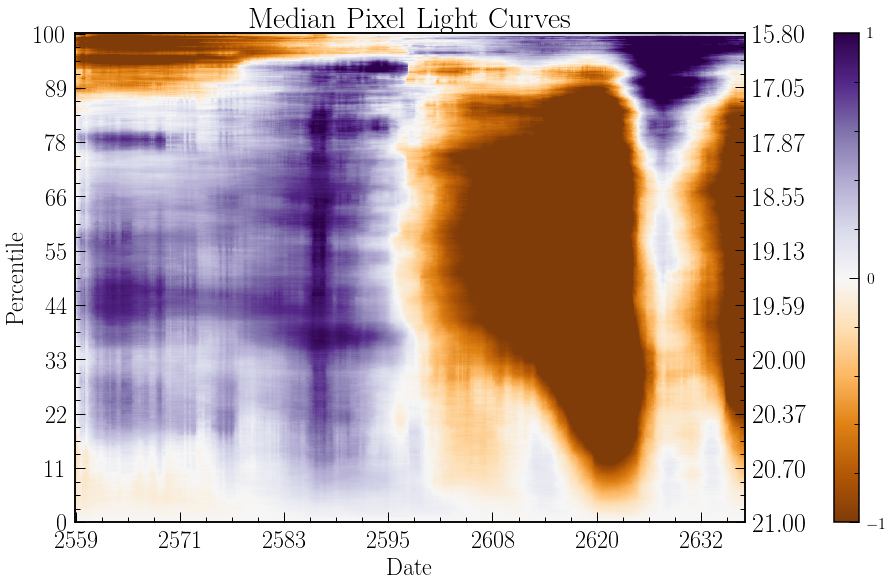

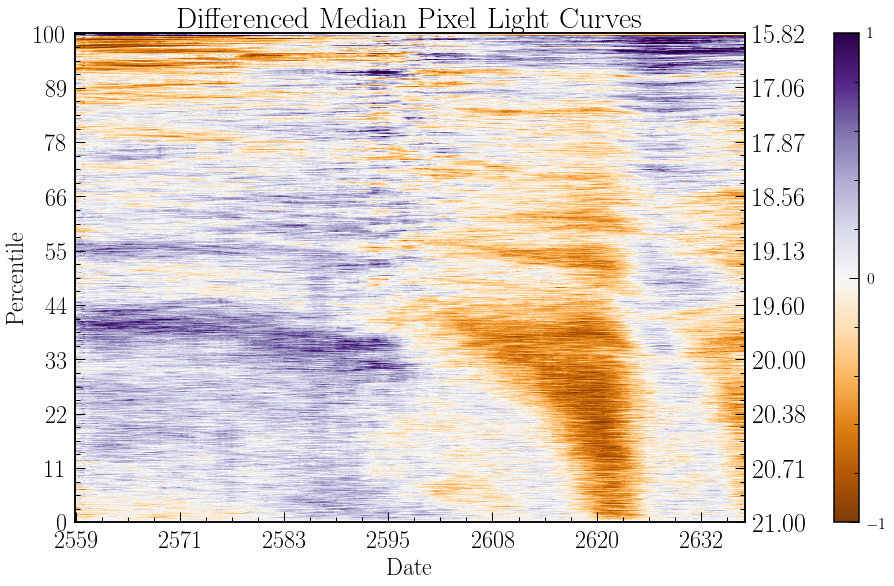

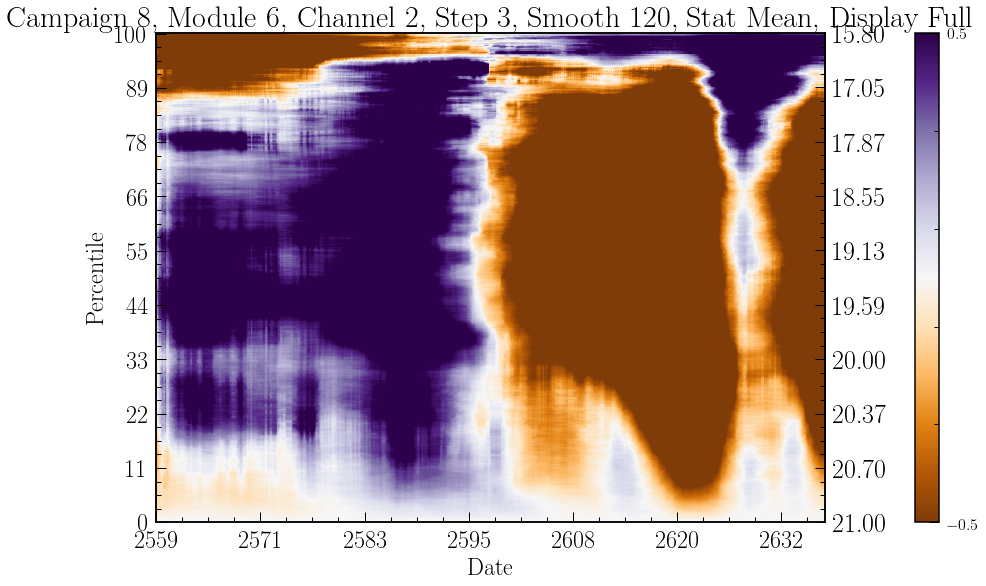

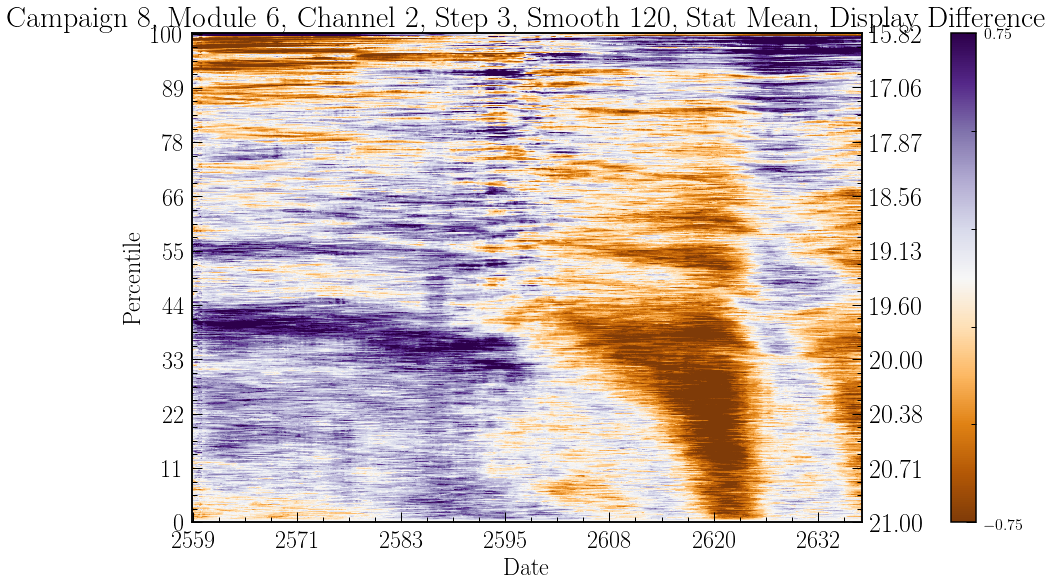

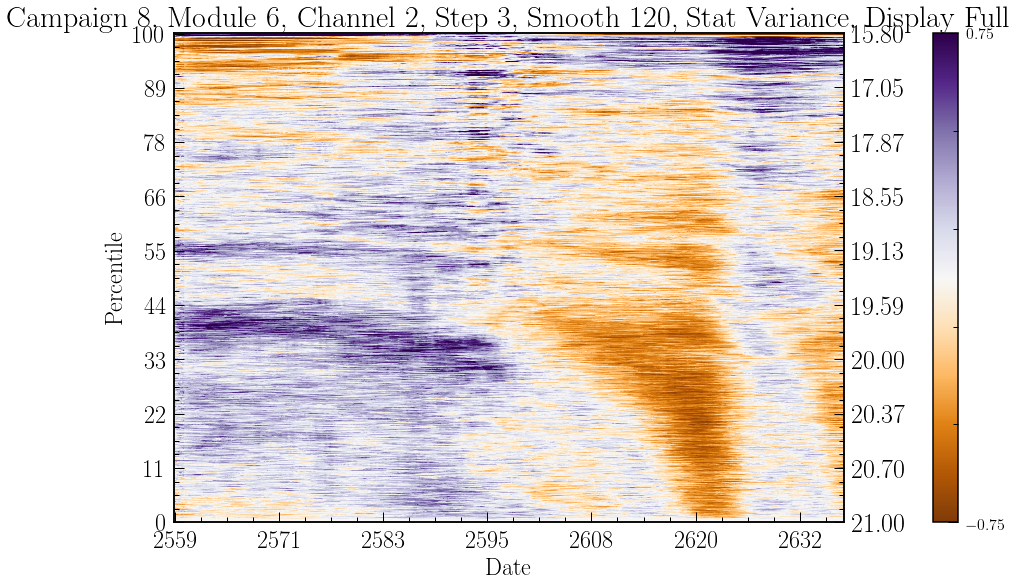

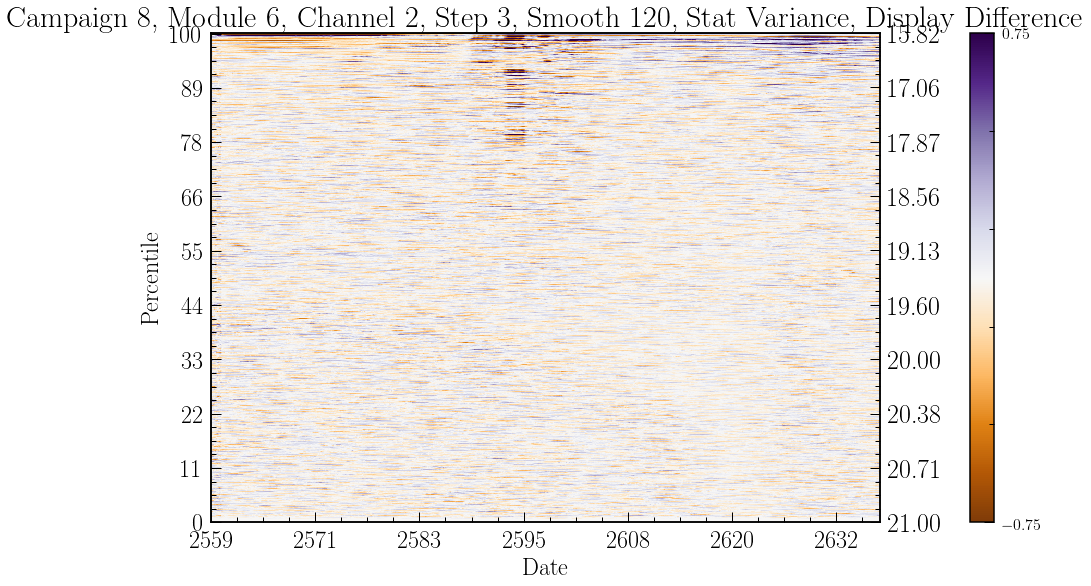

In [39]:
STEP=1
STEP = N/len(percentiles)*(9)/16
SMOOTH=120

title_args = (ccd.campaign, ccd.module, ccd.channel, STEP, SMOOTH)
title = "Campaign {}, Module {}, Channel {}, Step {}, Smooth {}, Stat {{}}, Display {{}}".format(*title_args)

args = make_pixel_lc(lc, percentiles, diff=False)

plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH, title="Median Pixel Light Curves");

args = make_pixel_lc(lc, percentiles, diff=True)

plot_pixel_image(args, ylim=(-1.0, 1.0), STEP=STEP, smooth=SMOOTH, title="Differenced Median Pixel Light Curves");

args = make_pixel_lc(lc, percentiles, diff=False, stat='mean')

plot_pixel_image(args, ylim=(-0.5, 0.5), STEP=STEP, smooth=SMOOTH, title=title.format('Mean', 'Full'));

args = make_pixel_lc(lc, percentiles, diff=True, stat='mean')

plot_pixel_image(args, ylim=(-0.75, 0.75), STEP=STEP, smooth=SMOOTH, title=title.format('Mean', 'Difference'));

args = make_pixel_lc(lc, percentiles, diff=False, stat='var')

plot_pixel_image(args, ylim=(-0.75, 0.75), STEP=STEP, smooth=SMOOTH, title=title.format('Variance', 'Full'));

args = make_pixel_lc(lc, percentiles, diff=True, stat='var')

plot_pixel_image(args, ylim=(-0.75, 0.75), STEP=STEP, smooth=SMOOTH, title=title.format('Variance', 'Difference'));


In [ ]:
#percentiles = np.linspace(0, 100, 501)

args = make_pixel_lc(lc, percentiles, diff=False, med_norm=True)

plot_pixel_image(args, ylim=(0.75, 1.25), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc, percentiles, diff=True, med_norm=True)

plot_pixel_image(args, ylim=(0.0, 1.5), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc, percentiles, diff=False, stat='mean', med_norm=True)

plot_pixel_image(args, ylim=(0.0, 1.5), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc, percentiles, diff=True, stat='mean', med_norm=True)

plot_pixel_image(args, ylim=(0.0, 1.5), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc, percentiles, diff=False, stat='var', med_norm=True)

plot_pixel_image(args, ylim=(0.0, 1.5), STEP=STEP, smooth=SMOOTH);

args = make_pixel_lc(lc, percentiles, diff=True, stat='var', med_norm=True)

plot_pixel_image(args, ylim=(0.0, 1.5), STEP=STEP, smooth=SMOOTH);


/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:128: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [98]:
def generate_lightcurve(pixels, aperture, mednorm=False, bkg_correct=True):
    
    lc = np.empty(len(pixels))
    if bkg_correct:
        lc[::] = np.nansum(pixels[:,aperture] - np.nanmedian(pixels[:,~aperture], axis=1).reshape(-1,1), axis=1)
    else:
        lc[::] = np.nansum(pixels[:,aperture], axis=1)
    #lc[::] = np.nansum(pixels[:,aperture], axis=1) - np.nanmedian(pixels[:,~aperture], axis=1)
    if mednorm:
        lc[::] /= np.nanmedian(pixels[:, aperture], axis=1)
    return lc

def get_full_flux_pixels(pipeline):
    d = pipeline.pix['TARGETTABLES'].data
    return d['FLUX'] + d['FLUX_BKG']

def get_aperture(pipeline, thresh):
    return np.array(pipeline.vj['APERTURE'].data > thresh, dtype=np.bool)

def print_aperture(*aperture, **kwargs):
    imgs = [print_image(ap, show=False, **kwargs) for ap in aperture]
    for ims in zip(*imgs):
        print u''.join(ims)
        
def print_images(*images, **kwargs):
    title = ["",""]
    if 'title' in kwargs:
        if type(kwargs['title']) is not str:
            title = kwargs['title']
        else:
            title[0] = kwargs['title']
        del kwargs['title']
    imgs = [print_image(im, show=False, title=t, **kwargs) for im,t in zip(images, title)]
    for ims in zip(*imgs):
        print u''.join(ims)
    
def get_vj_aperture(EPIC, aperture_type, aperture_index):
    
    cache_epics = dict(get_vj_aperture.cache)
    if EPIC in cache_epics:
        return cache_epics[EPIC][aperture_type].data[aperture_index].astype(np.bool)
    url = get_vj_url(EPIC, 8)
    hdu = next(fits_downloader([url]))
    get_vj_aperture.cache.append((EPIC,hdu))
    return get_vj_aperture(EPIC, aperture_type, aperture_index)

get_vj_aperture.cache = []
  
    
def print_image(image, vmin=None, vmax=None, scale='linear', size=1, invert=False, cbar=False, title=None, blank_nan=False, show=True, color='w'):
    
    #text_color = {'red':u'\u001b[31m', 'green':u"\u001b[32m", 'blue':u"\u001b[34m"}
    pixel_images = [u'█',u'▓',u'▒',u'░',u' ']
    #pixel_images = [text_color[key]+i for i in pixel_images for key in ['green', 'blue','red']]
    
    ###
    pixel_images = create_mono_bkg('k') + create_gradient(*('k'+color))[1:-1] + create_mono(color)
    ####
    N_unique = len(set(image.ravel()))
    if N_unique < len(pixel_images):
        pixel_images = [pixel_images[int(i)] for i in np.linspace(0,len(pixel_images)-0.1, N_unique)]
    
    N_levels = len(pixel_images)-1
    nan_char = [u'╳']
    if invert:
        pixel_images = pixel_images[::-1]
    if blank_nan:
        nan_char = [pixel_images[0]]
    pixel_images = nan_char + pixel_images
    
    scaled_image = copy(image).astype(np.float)
    mask = ~np.isnan(scaled_image)
    
    if scale == 'log':
        scaled_image[mask] = np.log10(scaled_image[mask])
        mask = ~np.isnan(scaled_image) # in case of new NaNs
    elif scale == 'symlog':
        scaled_image[mask] = np.log10(scaled_image[mask]*np.sign(scaled_image[mask]))*np.sign(scaled_image[mask])
        mask = ~np.isnan(scaled_image) # in case of new NaNs
    if vmin is None:
        vmin = np.nanmin(scaled_image)
    if vmax is None:
        vmax = np.nanmax(scaled_image)
        if vmax == vmin:
            vmin -= 1
    scaled_image[mask] -= vmin
    scaled_image[mask] /= (vmax-vmin)/(N_levels)
    #print scaled_image

    scaled_image[scaled_image > N_levels] = N_levels
    scaled_image[scaled_image < 0] = 0
    scaled_image[~mask] = -1
    scaled_image += 1
    
    #print scaled_image, N_levels
    image = []
    if cbar:
        values = np.linspace(vmin, vmax, N_levels+1)
        if scale == 'log':
            values = np.logspace(vmin, vmax, N_levels+1)
        elif scale == 'symlog':
            values = np.concatenate((-np.logspace(0, -vmin, (N_levels+1)/2)[::-1], np.logspace(0, vmax, (N_levels+1)/2)))
        def cbar():
            try:
                n_rows = scaled_image.shape[0]
                interval = max((n_rows*size+size/2)/(len(values)-1),1)
                for i in xrange(size/2,n_rows*size+size/2):
                    #index = i/interval
                    index = i
                    index = int(index*(len(pixel_images)-1)/(n_rows*size+size/2))
                    #if index == N_levels+1:
                    #    index = N_levels
                    if not (i - interval/2 + 1) % interval:
                        yield u"▕{0}{0}▏─ {1:.2f}".format(pixel_images[index+1], values[index])
                    else:
                        yield u"▕{0}{0}▏".format(pixel_images[index+1])
            except IndexError:
                print i, index, interval, len(values), N_levels, size, n_rows*size+size/2, n_rows
                raise
    else:
        def cbar():
            for i in xrange(scaled_image.shape[0]*size):
                yield ''
    color_bar = cbar()
    if title is not None:
        extra = 11 if cbar else 0
        padding = ' '*max(((scaled_image.shape[1]*size*2+extra-len(title))/2),0)
        image.append(''.join((padding, title, padding)))
    
    
    for i, row in enumerate(scaled_image):
        for _ in xrange(size):
            try:
                image.append(u'▕'+u''.join((pixel_images[int(r)]*2*size for r in row))+u'▏'+next(color_bar)+u' ')
            except IndexError:
                print row, N_levels, mask[i], i
                print scaled_image, mask
                raise
                
    if show:            
        print u'\n'.join(image)
    return image
                
pixel_images = [u'█',u'▓',u'▒',u'░',u' ']
text_color = {key:u'\u001b[3%im' % i for i, key in enumerate('krgybmcw')}
text_color.update({'_':u'\u001b[0m'})
background_color = {key:u'\u001b[4%im' % i for i, key in enumerate('krgybmcw')}

bc = background_color
tc = text_color
pim = pixel_images

def create_mono_bkg(c):
    return [tc['_']+bc[c]+p+tc['_'] for p in pim]

def create_mono(c):
    return [tc['_']+tc[c]+p+tc['_'] for p in pim]

def _create_gradient(c1, c2):

    c = (c1,c2)
    return [tc[c[i%2]]+bc[c[1-(i%2)]]+pim[i/2 if not i%2 else 3-i/2]+tc['_'] for i in xrange(8)]

def create_gradient(*args):
    
    return sum([_create_gradient(c1, c2)[1 if c1 != args[0] else 0:None if c2 == args[-1] else -1] for c1, c2 in zip(args[:-1], args[1:])], [])#+[tc['_']+u' '+tc['_']]

def fold(x, step):
    
    x_ = np.nanmean(filter(lambda y: len(y)==step, [x[i:i+step:] for i in xrange(0,len(x), step)]), axis=0)
    return x_

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/rodot/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


▕████████████████████████░░░░░░      ▓▓▓▓▓▓██████████████████▏▕  ▏ 
▕████████████████████████░░░░░░      ▓▓▓▓▓▓██████████████████▏▕  ▏─ -1.00 
▕████████████████████████░░░░░░      ▓▓▓▓▓▓██████████████████▏▕░░▏ 
▕████████████▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓      ░░░░░░██████▏▕░░▏─ 0.00 
▕████████████▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓      ░░░░░░██████▏▕░░▏ 
▕████████████▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓      ░░░░░░██████▏▕▓▓▏─ 1.00 
▕████████████      ▒▒▒▒▒▒████████████▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓      ▏▕▓▓▏ 
▕████████████      ▒▒▒▒▒▒████████████▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓      ▏▕██▏─ 2.00 
▕████████████      ▒▒▒▒▒▒████████████▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓      ▏▕██▏ 
▕████████████      ▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░▓▓▓▓▓▓██████▒▒▒▒▒▒▓▓▓▓▓▓▏▕██▏─ 2.00 
▕████████████      ▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░▓▓▓▓▓▓██████▒▒▒▒▒▒▓▓▓▓▓▓▏▕▓▓▏ 
▕████████████      ▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░▓▓▓▓▓▓██████▒▒▒▒▒▒▓▓▓▓▓▓▏▕▓▓▏─ 3.00 
▕██████▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓                  ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▏▕▒▒▏ 
▕██████▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓                  ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▏▕▒▒▏─ 4.00 
▕████

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in greater
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in less


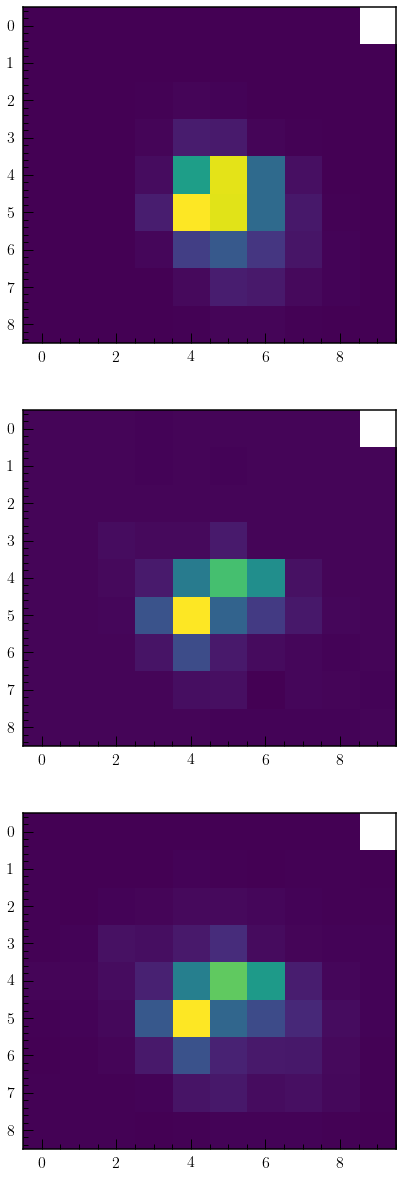

In [16]:
fig, ax = subplots(3,1, figsize=(7,21))
bkg = pipeline.pix['TARGETTABLES'].data['FLUX_BKG']
flux = pipeline.pix['TARGETTABLES'].data['FLUX']
stack = np.nanmean(flux, axis=0)
im = ax[0].imshow(stack)
ax[1].imshow(np.nanstd((flux+bkg), axis=0))
ax[2].imshow(np.nanstd(flux, axis=0))

all_apertures = [get_vj_aperture(EPIC, 'PRF_APER_TBL', i) for i in xrange(10)]
print_aperture(9-np.sum(all_apertures, axis=0), size=3, cbar=True, invert=True);
print ""
print_aperture(pipeline.vj['APERTURE'].data, size=3, cbar=True);
print ""
print_image(fluxToMag(np.nanmean(flux, axis=0)), size=3, cbar=True, scale='linear', invert=True);

In [17]:
#print_image(pipeline.images[0])
#print ""
#print_image(pipeline.images[0], scale='log')
#print ""
#print_image(pipeline.images[0], scale='log', invert=True)
#print ""
#print_image(pipeline.images[0], scale='log', size=2)
#print ''
#print_image(pipeline.images[0], scale='log', size=2, invert=True, cbar=True)
#print ''
#print_image(pipeline.images[0], scale='log', size=2, invert=False, cbar=True, title='Image of a Star')
#print ""
#print_image(pipeline.vj['APERTURE'].data, size=2, cbar=False, title='Image Aperture')
bkg = pipeline.pix['TARGETTABLES'].data['FLUX_BKG']
flux = pipeline.pix['TARGETTABLES'].data['FLUX']
#ap = get_vj_aperture(EPIC, 'PRF_APER_TBL', 1)
ap = get_aperture(pipeline, 1)

for i in (flux)[:100]:
    im = fluxToMag(np.copy(i))
    im2 = fluxToMag(np.copy(im))
    im2[ap] = np.nan
    im[~ap] = np.nan
    print_images(im, im2, scale='linear', size=2, cbar=True, invert=True, title='Image of EPIC %i' % EPIC, blank_nan=False, vmin=20.9, vmax=21.8)
    #print_image(im2, scale='log', size=2, cbar=True, title='Image of EPIC %i' % EPIC, blank_nan=False, vmin=2.4, vmax=2.5, color='b')
    time.sleep(0.05)
    clear_output(wait=True)

              Image of EPIC 220210778                                                                
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕  ▏─ 20.90 ▕        ░░░░╳╳╳╳░░░░░░░░░░░░░░░░╳╳╳╳╳╳╳╳▏▕  ▏─ 20.90 
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕░░▏─ 20.96 ▕        ░░░░╳╳╳╳░░░░░░░░░░░░░░░░╳╳╳╳╳╳╳╳▏▕░░▏─ 20.96 
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕▒▒▏─ 21.02 ▕░░░░╳╳╳╳░░░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░╳╳╳╳╳╳╳╳▏▕▒▒▏─ 21.02 
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕▓▓▏─ 21.08 ▕░░░░╳╳╳╳░░░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░╳╳╳╳╳╳╳╳▏▕▓▓▏─ 21.08 
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕██▏─ 21.14 ▕        ╳╳╳╳▓▓▓▓████████▒▒▒▒╳╳╳╳░░░░╳╳╳╳▏▕██▏─ 21.14 
▕╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳▏▕░░▏─ 21.20 ▕        ╳╳╳╳▓▓▓▓████████▒▒▒▒╳╳╳╳░░░░╳╳╳╳▏▕░░▏─ 21.20 
▕╳╳╳╳╳╳╳╳╳╳╳╳            ░░░░████╳╳╳╳╳╳╳╳▏▕░░▏─ 21.20 ▕▓▓▓▓╳╳╳╳░░░░╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳░░░░╳╳╳╳▏▕░░▏─ 21.20 
▕╳╳╳╳╳╳╳╳╳╳╳╳            ░░░░████╳╳╳╳╳╳╳╳▏▕▓▓▏─ 21.26 ▕▓▓▓▓╳╳╳╳░░░░╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳╳░░░░╳╳╳╳▏▕▓▓▏─ 21.26 
▕╳╳╳╳╳╳╳╳████             

In [163]:
print("Downloading...")
pipeline = VJPipeline(EPIC, ccd)
pipeline.download()

Downloading...


In [336]:

aperture = get_vj_aperture(EPIC, 'PRF_APER_TBL', 2)
#aperture = get_aperture(pipeline, 3)
aperture = get_aperture(pipeline, 5)
print_aperture(aperture, ~aperture)
#print aperture
print("Correcting...")
max_pix = magToFlux(1.5)
max_pix = np.inf
min_pix = 2000
pack = correct_target_pixels(EPIC, lc, aperture, max_pix=max_pix, min_pix=min_pix, smooth=0)
# Note: Smoothing is really messed up for negative pixels
c_lc, corrections, nearest, bin_positions, bin_lowers = pack
# Note: Smoothing definitely needs to be investigaed. 
#assert all(old_pack[0][~np.isnan(old_pack[0])]==pack[0][~np.isnan(pack[0])])

#  Too small and the correction is too large, 
#  to big and the correction is too noisey
# Note for later: Try with severe smoothing, around 240, 480, or even up to 1000
#  basically we're doing a linear convolution of a top hat function
#  so we should at least remove high frequency components to some extent
#  But I should check my math on that

print("Generating...")
mednorm = False
bkg_correct=False
new_lc = generate_lightcurve(pipeline.images, aperture, mednorm, bkg_correct=False)
lc_correction = generate_lightcurve(corrections, aperture, mednorm, bkg_correct=bkg_correct)
cor_lc = generate_lightcurve(c_lc, aperture, mednorm, bkg_correct=bkg_correct)
nearest_lc = generate_lightcurve(nearest, aperture, mednorm, bkg_correct=bkg_correct)
t = pipeline.vj['LIGHTCURVE'].data['TIME']
print "Done"
diff = pipeline.images-corrections-c_lc

assert (diff[~np.isnan(diff)] == 0.0).all(), "Correction Not Equal! {}, {}".format(np.nanmean(pipeline.images-corrections-c_lc)==0.0,np.nanstd(pipeline.images-corrections-c_lc)==0.0)



▕████████████████████▏ ▕                    ▏ 
▕████████████████████▏ ▕                    ▏ 
▕████████████████████▏ ▕                    ▏ 
▕████████████████████▏ ▕                    ▏ 
▕████████      ██████▏ ▕        ██████      ▏ 
▕██████        ██████▏ ▕      ████████      ▏ 
▕████████    ████████▏ ▕        ████        ▏ 
▕████████████████████▏ ▕                    ▏ 
▕████████████████████▏ ▕                    ▏ 
Correcting...
Max Pixel Flux For Correction set to inf
Min Pixel Flux For Correction set to 2000

[###############/............................................] Estimating...    

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in greater
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in greater_equal
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in less


[############################################################/] 0:00 remaining  
Generating...
Done


In [337]:
print np.nanmax(corrections[:2]+c_lc[:2]-pipeline.images[:2])
print pipeline.images[0][np.isnan(c_lc[0])]


A = generate_lightcurve(pipeline.images[:2], aperture, mednorm, bkg_correct=bkg_correct)
B = generate_lightcurve(c_lc[:2], aperture, mednorm, bkg_correct=bkg_correct)
C = generate_lightcurve(corrections[:2], aperture, mednorm, bkg_correct=bkg_correct)

a_=np.empty((2,)+pipeline.images.shape[1:])
b_=np.empty((2,)+pipeline.images.shape[1:])
c_=np.empty((2,)+pipeline.images.shape[1:])

a_[::] = pipeline.images[:2]
b_[::] = c_lc[:2]
c_[::] = corrections[:2]



print "a_-(b_+c_)",np.nansum(a_, axis=(1,2))-(np.nansum(b_, axis=(1,2))+np.nansum(c_, axis=(1,2)))
print "a_",np.nansum(a_, axis=(1,2))
print "b_",np.nansum(b_, axis=(1,2))
print "c_",np.nansum(c_, axis=(1,2))
print "b_+c_",np.nansum(b_, axis=(1,2))+np.nansum(c_, axis=(1,2))

print A-(B+C)

print a_[:, aperture]
print b_[:, aperture]
print c_[:, aperture]
print nearest[:2, aperture]

print generate_lightcurve(pipeline.images[:2]-(corrections[:2]+c_lc[:2]), aperture, False, False)

0.0
[ nan]
a_-(b_+c_) [ 0.  0.]
a_ [ 24015.09595473  23969.5114006 ]
b_ [ 20766.23643758  21350.54647226]
c_ [ 3248.85951715  2618.96492834]
b_+c_ [ 24015.09595473  23969.5114006 ]
[ 0.00166512 -0.00130653]
[[ 2013.10778809  7794.82666016  2506.24511719    20.05759239
   1750.97009277  3219.99194336  1673.34887695   110.65631866
   1105.58300781]
 [ 2541.05566406  7309.70410156  2041.34436035    25.90732765
   2299.41040039  3167.13305664  1667.57556152   166.43235779
   1188.01269531]]
[[ 1671.98483144  5897.85469787  2125.65299075    20.05759239
   1750.97009277  2589.81947157  1673.34887695   110.65631866
   1105.58300781]
 [ 2109.56106223  6159.65519204  1719.94223834    25.90732765
   2249.72161929  2500.80254277  1667.57556152   166.43235779
   1188.01269531]]
[[  341.12295665  1896.97196229   380.59212643     0.             0.
    630.17247179     0.             0.             0.        ]
 [  431.49460183  1150.04890953   321.40212201     0.            49.6887811
    666.3305138

In [338]:


def get_correction_column(index, as_magnitude=True, only_aperture=False, header=True):


    if header:
        
        print "Corrections for EPIC %i" % EPIC
        print "  Units:", {True:"KepMag", False:"Flux"}[as_magnitude]
        print "  Pixels:", ('All' if not only_aperture else "Aperture")
        print ""
        print "    %tile     Near      Raw     Corr     Plcm     Plcs       Min     Max     Var     Med    Mean"
        print "   ----------------------------------------------------+-----------------------------------------"

    if hasattr(index, '__iter__'):
        for i in index:
            get_correction_column(i, as_magnitude, only_aperture, header=False)
        return
    
    idx = (index + N) % N
    print "{}Cadence: {:<4d}{}                                          |".format(text_color['b'],idx,text_color['_'])
    #print "Mask"
    mask = ~np.isnan(bin_positions[index])
    #print Original
    Original = pipeline.images[index][mask]
    #print "Bins"
    Bins = bin_positions[index][mask]
    #print "Nearest"
    Nearest = nearest[index][mask]
    #print "Bin Values (min, max, var, med, mean )"
    Bin_Means = lc[index,bin_positions[index,mask].astype(np.int), :]
    #print "Corrections"
    Corrections = corrections[index][mask]
    #print "Pixel LC Mean"
    PLC_Mean = np.nanmean(lc[:,bin_positions[index,mask].astype(np.int),4], axis=0)
    #print "Pixel LC Var"
    PLC_Var = np.nanstd(lc[:,bin_positions[index,mask].astype(np.int),4], axis=0)
    order = np.argsort(Bins)


    for org, bp, ne, c, plcm, plcv, bm in zip(Original[order], Bins[order], Nearest[order], Corrections[order], PLC_Mean[order], PLC_Var[order], Bin_Means[order]):
        params = [bp/1.0, ne, org, c, plcm, plcv] + list(bm)
        if as_magnitude:
            params[1:] = fluxToMag(np.array(params[1:]))
            params[3] = params[1] - params[4]
        params.append(text_color['_'])
        color = text_color['_']+' '
        if org in pipeline.images[index][aperture]:
            color = text_color['r']+'>'
        elif only_aperture:
            continue
        print "{}{:>7.2f}% {:>8.2f} {:>8.2f} {:>8.2f} {:>8.2f} {:>8.2f} | {:>7.2f} {:>7.2f} {:>7.2f} {:>7.2f} {:>7.2f}{}".format(color, *params)
    
get_correction_column(np.array([48*5,-48*10]), False, True)
#fig, ax = subplots(1,1)

#ax.hist(fluxToMag(lc[:,22,4][~np.isnan(lc[:,22,4])]), histtype='step', bins=100, range=(22.2,22.8))


#dev = ((lc[:,:,4] - np.nanmean(lc[:,:,4], axis=0).reshape(1,-1))/np.nanstd(lc[:,:,4], axis=0).reshape(1,-1)).ravel()

#ax.hist(dev[~np.isnan(dev)], bins=1000, histtype='step', range=(-10,10));


Corrections for EPIC 220210778
  Units: Flux
  Pixels: Aperture

    %tile     Near      Raw     Corr     Plcm     Plcs       Min     Max     Var     Med    Mean
   ----------------------------------------------------+-----------------------------------------
Cadence: 240                                           |
>  95.00%  2619.87  3052.15   728.57  2300.25   289.05 | 2125.32 3164.79 92998.61 2600.06 2619.87
>  95.00%  2619.87  3066.24   733.85  2300.25   289.05 | 2125.32 3164.79 92998.61 2600.06 2619.87
>  96.00%  4183.01  3503.17   645.52  3719.68   382.54 | 3164.79 5478.23 445248.38 4155.51 4183.01
>  96.00%  4183.01  5441.77  1571.52  3719.68   382.54 | 3164.79 5478.23 445248.38 4155.51 4183.01
Cadence: 3373                                          |
>  95.00%  1939.69  2028.16  -142.43  2300.25   289.05 | 1572.68 2492.27 61501.89 1910.05 1939.69
>  96.00%  3279.68  3532.02   103.41  3719.68   382.54 | 2492.27 4397.99 286381.41 3205.77 3279.68
>  97.00%  6256.72  7589.11  1820.6

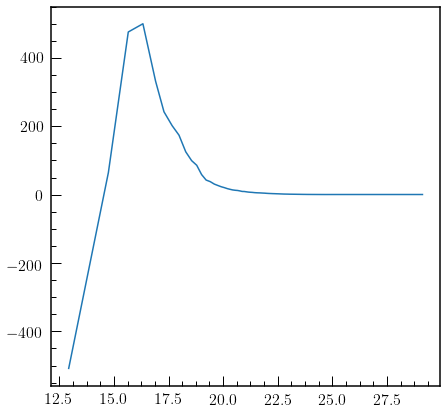

In [355]:
p=98
idx = 48*5
val, diff =  lc[-idx,:,3:5],lc[idx,:,3:5]-np.nanmean(lc[:,:,3:5], axis=0)
fig, ax = subplots(1,1)

ax.plot(fluxToMag(val[:,0]), diff[:,0])


. . . . . . 


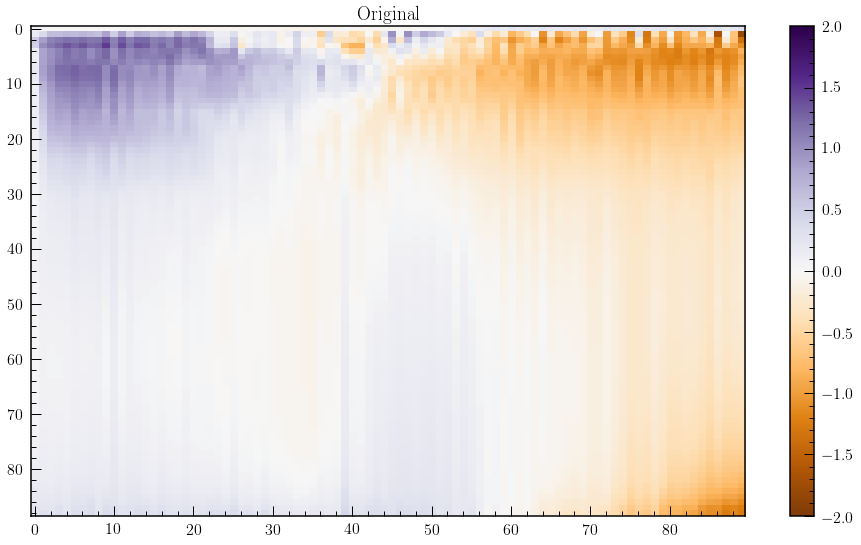

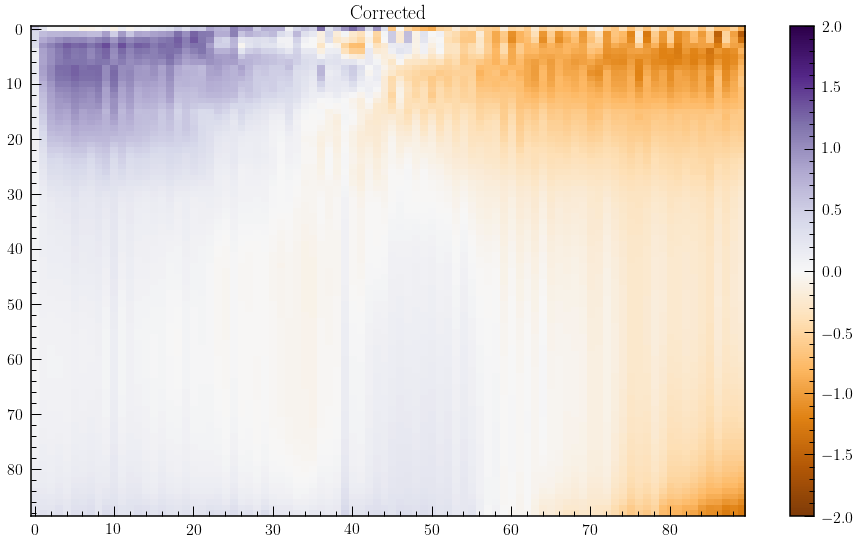

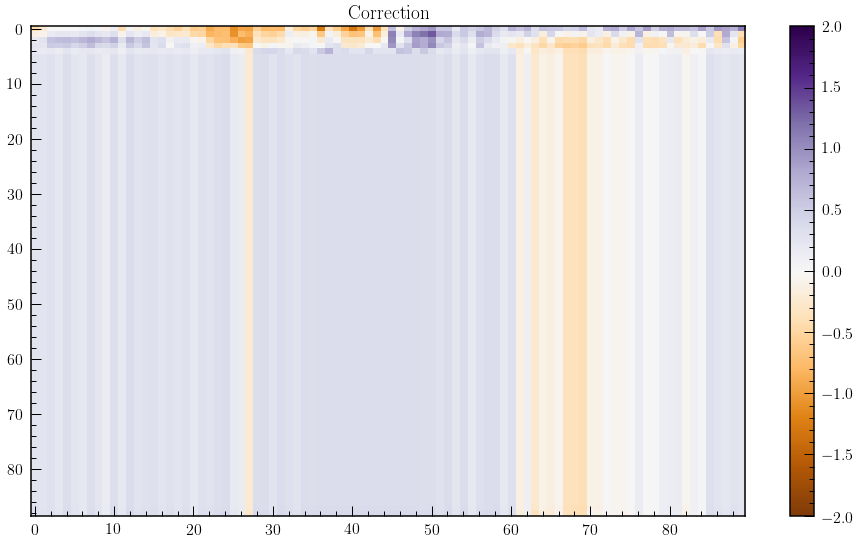

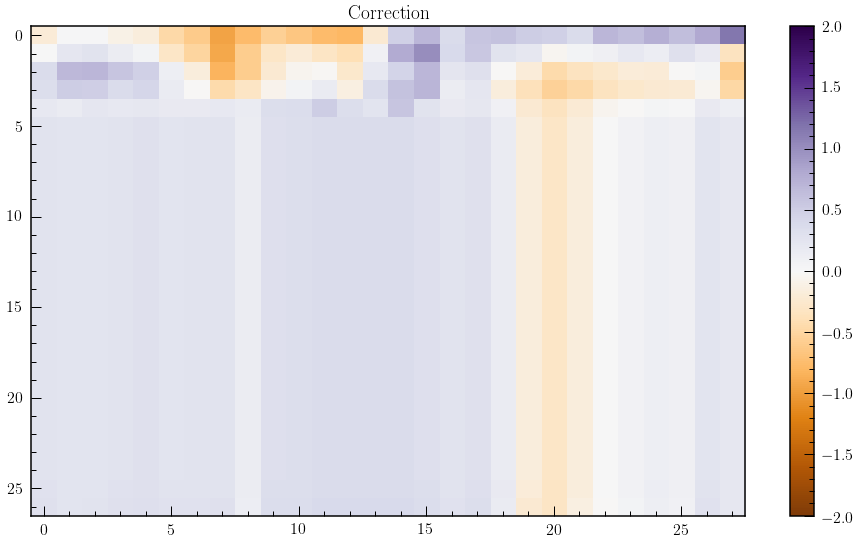

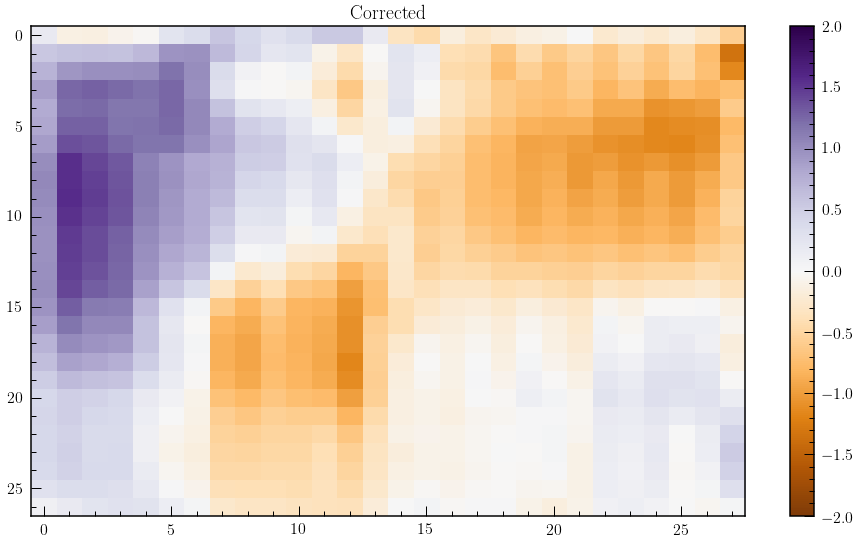

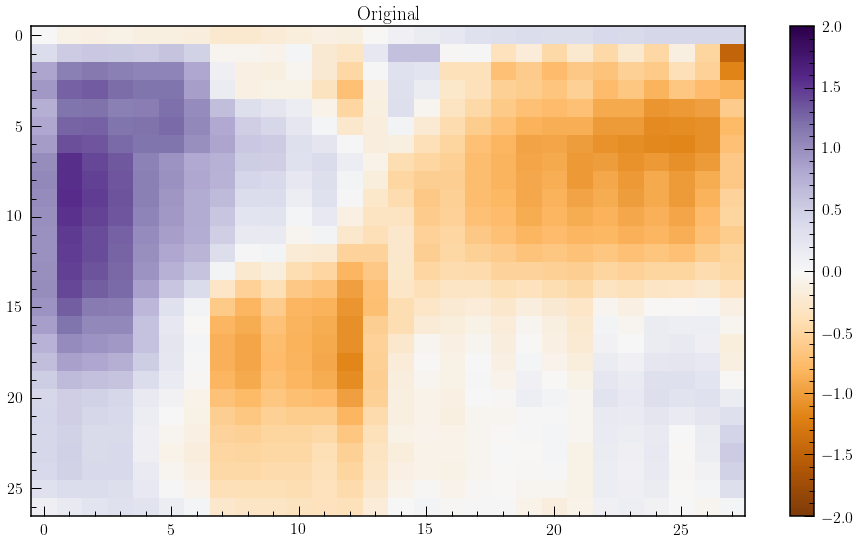

In [341]:
# make an image plot that shows the cumulative sum of pixels within the aperture at each step

def cum_sum_image(image_set, aperture, title=None):
    
    STEP = N/len(aperture[aperture])
    smooth=4
    vmin = -2
    vmax = 2
    #STEP = 300
    
    image = np.empty(image_set[:,aperture].shape)
    image = np.sort(image_set[:, aperture], axis=1)
    image[::] = np.cumsum(image, axis=1)
    image[::] -= np.nanmean(image, axis=0).reshape(1,-1)
    image[::] /= np.nanstd(image, axis=0).reshape(1,-1)
    image = image.T
    
    if smooth: # This is very very slow
        if smooth is True:
            smooth = 30
        #image[::] = np.array([runningMean(y,120) for y in image])
        image = np.array(runningMean(image.T,smooth,axis=0)).T[::-1]
        
    image = np.array([np.mean(image[:,i:i+STEP], axis=1) for i in xrange(0,image.shape[1],STEP)]).T
    
    fig, ax = subplots(1,1, figsize = (16,9))
    if title is not None:
        ax.set_title(title)
    
    #cmap = rplot.palettable.cubehelix.perceptual_rainbow_16.mpl_colormap
    cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap
    
    im = ax.imshow(image, cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(im)
    print '.',
    return im

cum_sum_image(pipeline.images, get_aperture(pipeline, 0), title='Original')
cum_sum_image(c_lc, get_aperture(pipeline, 0), title='Corrected')
cum_sum_image(corrections, get_aperture(pipeline, 0), title='Correction')

cum_sum_image(corrections, get_aperture(pipeline, 3), title='Correction')
cum_sum_image(c_lc, get_aperture(pipeline, 3), title='Corrected')
cum_sum_image(pipeline.images, get_aperture(pipeline, 3), title='Original')
print ''
#cum_sum_image(pipeline.images, get_aperture(pipeline, 0))

Plotting...
LC Mean: 20105.788769
LC Std: 2071.92974629
----
Nearest LC Mean: 16456.6177059
Nearest LC Std: 2961.50684984
----
Corrected LC Mean: 17019.3903961
Corrected LC Std: 1753.8915281
----
Correction Mean: 3086.39838429
Correction Std: 930.335264868
----


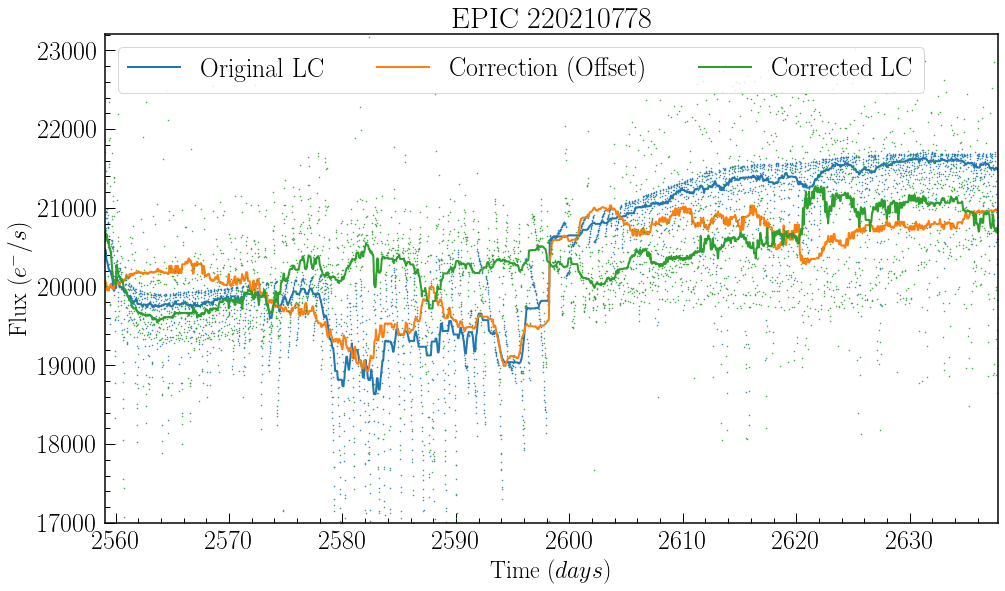

In [340]:
from matplotlib.pyplot import savefig
print("Plotting...")
fig, ax = subplots(1,1, figsize=(16,9))
ax.set_title("EPIC %i" % EPIC, fontsize=30)
ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)
ax.set_xlabel('Time $(days)$', fontsize=24)

smoothing = 48*2
plotNiceIntervals(ax, t, new_lc, label='Original LC', N=smoothing)

#plotNiceIntervals(ax, t, nearest_lc, label='LC from nearest pixels', N=30)
#plotNiceIntervals(ax, t, new_lc+np.nanmedian(nearest_lc)-nearest_lc, label='Corrected LC', N=30)
plotNiceIntervals(ax, t, (lc_correction-np.nanmedian(lc_correction))+np.nanmedian(new_lc), label='Correction (Offset)', N=smoothing)
plotNiceIntervals(ax, t, cor_lc-np.nanmedian(cor_lc)+np.nanmedian(new_lc), label='Corrected LC', N=smoothing)
#plotNiceIntervals(ax, t, new_lc-nearest_lc+np.nanmedian(new_lc), label='Deviation From Nearest Pixel', N=10)


m = np.nanmedian(nearest_lc)
#plotNiceIntervals(ax, t, nearest_lc, label='Correction', N=60)

#ax.set_ylim(22000,23550)
#ax.set_ylim(318000,321500)
#ax.set_ylim(90500,91500)
#ax.lines[-2].set_visible(False)
ax.lines[-4].set_visible(False)
#ax.lines[-6].set_visible(False)
#ax.lines[-8].set_visible(False)
ax.legend(fontsize=26, ncol=3)

ax.set_ylim(np.nanmean(new_lc)-np.nanstd(new_lc)*1.5,np.nanmean(new_lc)+np.nanstd(new_lc)*1.5)
ax.set_xlim(t[0], t[-1])
#ax.set_ylim(-100,100)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 


for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

print "LC Mean:",np.nanmean(new_lc)
print "LC Std:",np.nanstd(new_lc)
print "----"
print "Nearest LC Mean:",np.nanmean(nearest_lc)
print "Nearest LC Std:",np.nanstd(nearest_lc)
print "----"
print "Corrected LC Mean:",np.nanmean(cor_lc)
print "Corrected LC Std:", np.nanstd(cor_lc)
print "----"
print "Correction Mean:", np.nanmean(lc_correction)
print "Correction Std:", np.nanstd(lc_correction)
print "----"

originals = [np.nanmean(pipeline.images[:N/2], axis=0), np.nanmean(pipeline.images[N/2:], axis=0)]
print_images(originals[0], originals[1], size=2, cbar=False, scale='log', title='Original', blank_nan=False, vmin=0.0, vmax=4.0);
print_image(originals[1] - originals[0], size=2, cbar=True, scale='symlog', title='Difference', blank_nan=False);
print ""
'''
originals = [np.nanmean(corrections[:N/2], axis=0), np.nanmean(corrections[N/2:], axis=0)]
print_images(originals[0], originals[1], size=2, cbar=False, scale='symlog', title='Corrections', blank_nan=False);
print_image(originals[1] - originals[0], size=2, cbar=True, scale='symlog', title='Difference', blank_nan=False);
print ''
originals = [np.nanmean(c_lc[:N/2], axis=0), np.nanmean(c_lc[N/2:], axis=0)]
print_images(originals[0], originals[1], size=2, cbar=False, scale='log', title='Corrected', blank_nan=False, vmin=0.0, vmax=4.0);
print_image(originals[1] - originals[0], size=2, cbar=True, scale='symlog', title='Difference', blank_nan=False);
print ""
print_image(corrections[N/4], size=2, cbar=True, scale='symlog', title='Corrections', blank_nan=False);
print_image(pipeline.images[N/4], size=2, cbar=True, scale='log', title='Original', blank_nan=False);
#print_image(corrections[N/4]/pipeline.images[N/4]*100, size=2, cbar=True, scale='log', title='Percentage', blank_nan=False);
print_image(c_lc[N/4], size=2, cbar=True, scale='log', title='Corrected', blank_nan=False);
''';

savefig('EPIC%i_Cepheid_Corrected.eps' % EPIC)

Folding...
Folding Over Interval 1248


(0.0, 25.4785801837279)

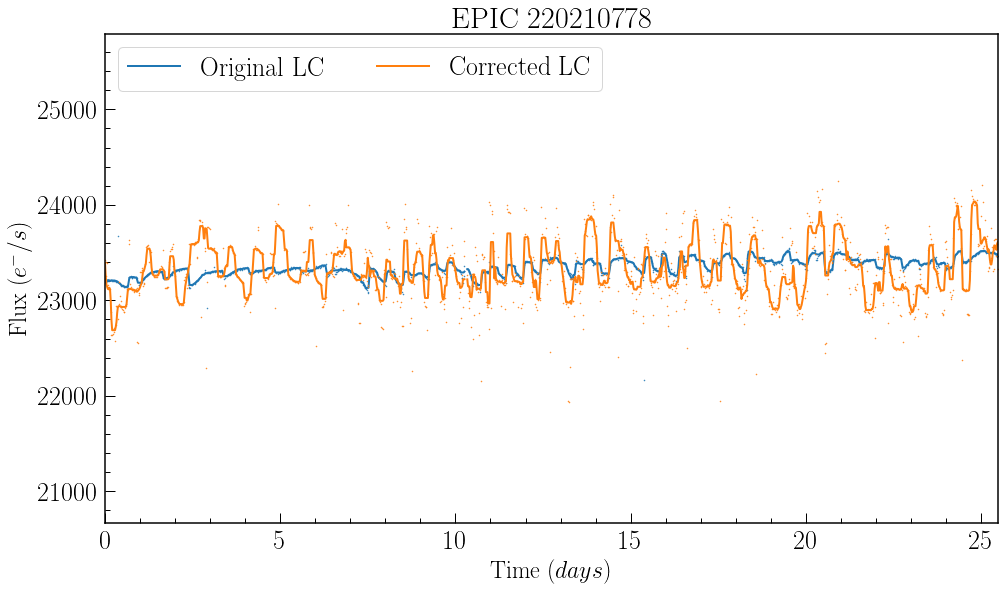

In [47]:

print "Folding..."

fig, ax = subplots(1,1, figsize=(16,9))
ax.set_title("EPIC %i" % EPIC, fontsize=30)
ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)
ax.set_xlabel('Time $(days)$', fontsize=24)

smoothing = 10
folding = int(1/0.388*1/(t[1]-t[0]))
folding = int(7.65*2*1/(t[1]-t[0]))
folding = int(25.5*1/(t[1]-t[0]))
print "Folding Over Interval %i" % folding
t_ = t[:folding]-t[0]
_cor_lc = cor_lc-np.nanmedian(cor_lc)+np.nanmedian(new_lc)
#print t_-t_[0]
#for i in filter(lambda x: len(x) == folding, [_cor_lc[i:i+folding] for i in xrange(0,len(new_lc), folding)][:6]):
#    plotNiceIntervals(ax, t_, i, N=smoothing)

plotNiceIntervals(ax, t_, fold(new_lc[folding/2:], folding), label='Original LC', N=smoothing)

#plotNiceIntervals(ax, t_, fold((lc_correction-np.nanmedian(lc_correction))+np.nanmedian(new_lc), folding), label='Correction (Offset)', N=smoothing)
plotNiceIntervals(ax, t_, fold(_cor_lc[folding/2:], folding), label='Corrected LC', N=smoothing)


#m = np.nanmedian(nearest_lc)
#plotNiceIntervals(ax, t, nearest_lc, label='Correction', N=60)

#ax.set_ylim(22000,23550)
#ax.set_ylim(318000,321500)
#ax.set_ylim(90500,91500)
#ax.lines[-2].set_visible(False)
#ax.lines[-4].set_visible(False)
#ax.lines[-6].set_visible(False)
#ax.lines[-8].set_visible(False)
ax.legend(fontsize=26, ncol=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 
    
ax.set_ylim(np.nanmean(new_lc)-np.nanstd(new_lc)*1.5,np.nanmean(new_lc)+np.nanstd(new_lc)*1.5)
ax.set_xlim(t_[0], t_[-1])
#ax.set_ylim(850,1150)

#savefig('EPIC%i_Cepheid_Corrected_Folded.eps' % EPIC)

In [48]:
# TODO: Correct mutilpe objects in modules 4,6 and 11, 
# show before and after of means, hopefully the after result looks like white noise

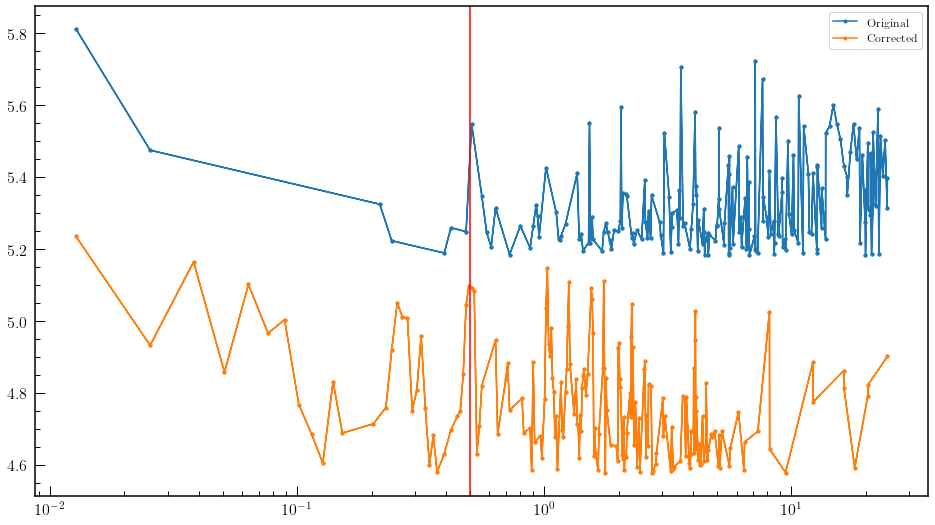

In [66]:
lc_fft = np.fft.fft(new_lc)
cor_fft = np.fft.fft(cor_lc-np.nanmedian(cor_lc)+np.nanmedian(new_lc))

freq = np.fft.fftfreq(len(lc_fft), t[1]-t[0])

lc_fft = np.fft.fftshift(lc_fft)
cor_fft = np.fft.fftshift(cor_fft)
freq = np.abs(np.fft.fftshift(freq))

fig, ax = subplots(1,1, figsize=(16,9))
lc_mask = (np.abs(lc_fft) > np.percentile(np.abs(lc_fft), 90)) & (np.abs(freq) != 0)
cor_mask = (np.abs(cor_fft) > np.percentile(np.abs(cor_fft), 90)) & (np.abs(freq) != 0)

ax.plot(freq[lc_mask], np.log10(np.abs(lc_fft))[lc_mask], marker='.', ls='-', label='Original')
ax.plot(freq[cor_mask], np.log10(np.abs(cor_fft))[cor_mask], marker='.', ls='-', label='Corrected')
ax.set_xscale('log')
ax.axvline(0.5, color='r')
ax.legend()

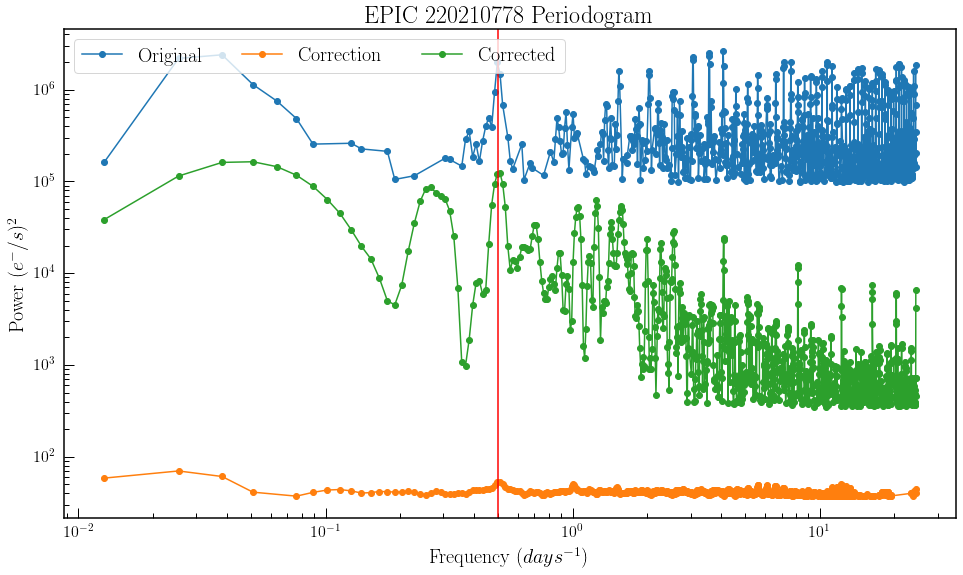

In [67]:
from scipy.signal import periodogram

f_lc, lc_p = periodogram(new_lc, 1.0/(t[1]-t[0]), 'flattop', scaling='spectrum')
f_cor, cor_p = periodogram(cor_lc, 1.0/(t[1]-t[0]), 'flattop', scaling='spectrum')

f_corr, corr_p = periodogram(lc_correction, 1.0/(t[1]-t[0]), 'flattop', scaling='spectrum')



fig, ax = subplots(1,1, figsize=(16,9))

p = 50
lc_mask = lc_p > np.percentile(lc_p, p)
cor_mask = cor_p > np.percentile(cor_p, p)
corr_mask = corr_p > np.percentile(corr_p, p)

ax.semilogy(f_lc[lc_mask], lc_p[lc_mask]*1e2, marker='o', ls='-', label='Original');
ax.semilogy(f_corr[corr_mask], corr_p[corr_mask], marker='o', ls='-', label='Correction');
ax.semilogy(f_cor[cor_mask], cor_p[cor_mask]*0.5e1, marker='o', ls='-', label='Corrected');
ax.legend(fontsize=20, ncol=3);
ax.set_title("EPIC %i Periodogram" % EPIC, fontsize=24)
ax.set_xlabel('Frequency $(days^{-1})$', fontsize=20);
ax.set_ylabel('Power $(e^{-}/s)^{2}$', fontsize=20);
ax.set_xscale('log')
ax.axvline(0.5, color='r')
#ax.set_ylim(1e2, 1e6)

In [26]:
#for c, o in zip(c_lc[:100], pipeline.images):
#    print_images(c, o, size=2, cbar=False, scale='log', title='Corrected', blank_nan=False, vmin=0.0, vmax=2.8);
#    clear_output(wait=True)
#    time.sleep(0.05)
#for c in c_lc[:100]:
for i,(c, n) in enumerate(zip(c_lc, nearest)[:100]):
    title_c = 'Corrected Mag: {:>5.3f}     '.format(fluxToMag(np.nansum(c[aperture]-np.nanmedian(c[~aperture]))))
    title_n = 'Nearest Mag: {:>5.3f}'.format(fluxToMag(np.nansum(n[aperture]-np.nanmedian(n[~aperture]))))
    print 'Frame {:>4d}'.format(i)
    imgs = map(fluxToMag, (c,n))
    print_images(fluxToMag(c), fluxToMag(n), size=1, cbar=True, scale='linear', title=(title_c, title_n), blank_nan=False, vmin=20.5, vmax=21.3, invert=True);
    
    clear_output(wait=True)
    time.sleep(0.05)

Frame   99
  Corrected Mag: 14.318             Nearest Mag: 14.186      
▕████╳╳╳╳████████╳╳╳╳▏▕  ▏─ 20.50 ▕██████╳╳████████╳╳╳╳▏▕  ▏─ 20.50 
▕██╳╳╳╳██████╳╳██╳╳╳╳▏▕░░▏─ 20.55 ▕██╳╳████████████╳╳╳╳▏▕░░▏─ 20.55 
▕████╳╳██  ░░██╳╳██╳╳▏▕▓▓▏─ 20.66 ▕████╳╳░░  ▒▒██╳╳██╳╳▏▕▓▓▏─ 20.66 
▕╳╳╳╳████    ░░████╳╳▏▕░░▏─ 20.77 ▕██╳╳██░░    ▓▓████╳╳▏▕░░▏─ 20.77 
▕██████          ████▏▕▒▒▏─ 20.87 ▕██████          ████▏▕▒▒▏─ 20.87 
▕╳╳████          ████▏▕▒▒▏─ 20.93 ▕██████          ████▏▕▒▒▏─ 20.93 
▕████████        ████▏▕░░▏─ 21.03 ▕████████        ▓▓██▏▕░░▏─ 21.03 
▕████████          ██▏▕░░▏─ 21.14 ▕████████        ▒▒██▏▕░░▏─ 21.14 
▕██╳╳██████▒▒░░▓▓████▏▕▓▓▏─ 21.25 ▕██╳╳██████      ████▏▕▓▓▏─ 21.25 


In [27]:
print fluxToMag(630)
print fluxToMag(30)
print np.nanmax(fluxToMag(c_lc))
print np.nanmin(fluxToMag(c_lc))

18.1030217471
21.4085699839
36.415444365
15.1389843812


In [28]:
print np.nanmax(nearest)
print np.nanmin(nearest)
print np.nanmax(np.nansum(nearest, axis=(1,2)))
print np.nanmean(nearest)
print_image(nearest[0], size=3, cbar=True, scale='log', title='Nearest Pixels', blank_nan=True);
print ''
print_image(pipeline.images[0]-nearest[0], size=3, cbar=True, scale='log', title='Subtracted', blank_nan=True);
print fluxToMag(10000)
print EPIC

9988.87304688
-10.3982000351
39982.9340515
269.603131586
                            Nearest Pixels                            
▕░░░░░░████████████░░░░░░            ▓▓▓▓▓▓██████████████████▏▕██▏─ 0.09 
▕░░░░░░████████████░░░░░░            ▓▓▓▓▓▓██████████████████▏▕▓▓▏─ 0.19 
▕░░░░░░████████████░░░░░░            ▓▓▓▓▓▓██████████████████▏▕▓▓▏─ 0.19 
▕      ████████████░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░      ██████▒▒▒▒▒▒▏▕▒▒▏─ 0.40 
▕      ████████████░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░      ██████▒▒▒▒▒▒▏▕▒▒▏─ 0.40 
▕      ████████████░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░      ██████▒▒▒▒▒▒▏▕░░▏─ 0.85 
▕██████████████████▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░░░░░░░░░░░░░▏▕  ▏─ 1.82 
▕██████████████████▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░░░░░░░░░░░░░▏▕  ▏─ 1.82 
▕██████████████████▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓░░░░░░░░░░░░░░░░░░▏▕░░▏─ 3.87 
▕██████      ░░░░░░▒▒▒▒▒▒████████████▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░      ▏▕░░▏─ 3.87 
▕██████      ░░░░░░▒▒▒▒▒▒████████████▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░      ▏▕▓▓▏─ 8.25 
▕██████      ░░░░░░▒▒▒▒▒▒████████████▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░   

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in log10
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in greater
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in less


In [29]:

for i,c in enumerate(nearest[:100]):
    title = 'Frame {:>4d}, Mag: {:.3f}'.format(i, fluxToMag(np.nansum(c)))
    print_image(fluxToMag(c), scale='linear', size=2, cbar=True, title=title, blank_nan=False, vmin=16.5, vmax=26, color='r', invert=True)
    clear_output(wait=True)
    time.sleep(0.05)

              Frame   99, Mag: 14.151              
▕▒▒▒▒▒▒▒▒████╳╳╳╳░░░░░░░░    ░░░░╳╳╳╳╳╳╳╳▏▕  ▏─ 16.50 
▕▒▒▒▒▒▒▒▒████╳╳╳╳░░░░░░░░    ░░░░╳╳╳╳╳╳╳╳▏▕░░▏─ 17.13 
▕░░░░╳╳╳╳████░░░░▒▒▒▒▓▓▓▓████░░░░╳╳╳╳╳╳╳╳▏▕▒▒▏─ 17.77 
▕░░░░╳╳╳╳████░░░░▒▒▒▒▓▓▓▓████░░░░╳╳╳╳╳╳╳╳▏▕▓▓▏─ 18.40 
▕▒▒▒▒▒▒▒▒╳╳╳╳▒▒▒▒░░░░▓▓▓▓░░░░╳╳╳╳    ╳╳╳╳▏▕██▏─ 19.03 
▕▒▒▒▒▒▒▒▒╳╳╳╳▒▒▒▒░░░░▓▓▓▓░░░░╳╳╳╳    ╳╳╳╳▏▕░░▏─ 19.67 
▕████╳╳╳╳░░░░▓▓▓▓▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒    ╳╳╳╳▏▕░░▏─ 19.67 
▕████╳╳╳╳░░░░▓▓▓▓▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒    ╳╳╳╳▏▕▓▓▏─ 20.30 
▕░░░░░░░░░░░░░░░░        ░░░░░░░░▓▓▓▓▓▓▓▓▏▕▒▒▏─ 20.93 
▕░░░░░░░░░░░░░░░░        ░░░░░░░░▓▓▓▓▓▓▓▓▏▕▒▒▏─ 21.57 
▕████░░░░░░░░▓▓▓▓            ████▓▓▓▓▓▓▓▓▏▕▓▓▏─ 22.20 
▕████░░░░░░░░▓▓▓▓            ████▓▓▓▓▓▓▓▓▏▕░░▏─ 22.83 
▕    ░░░░░░░░▒▒▒▒▒▒▒▒░░░░▒▒▒▒▓▓▓▓▒▒▒▒▓▓▓▓▏▕░░▏─ 22.83 
▕    ░░░░░░░░▒▒▒▒▒▒▒▒░░░░▒▒▒▒▓▓▓▓▒▒▒▒▓▓▓▓▏▕  ▏─ 23.47 
▕░░░░    ░░░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓░░░░▒▒▒▒░░░░▏▕░░▏─ 24.10 
▕░░░░    ░░░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓░░░░▒▒▒▒░░░░▏▕▒▒▏─ 24.73 
▕░░░░╳╳╳╳████▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▏▕▓▓▏─ 25.37 
▕░░░░╳╳╳╳████

KeyboardInterrupt: 

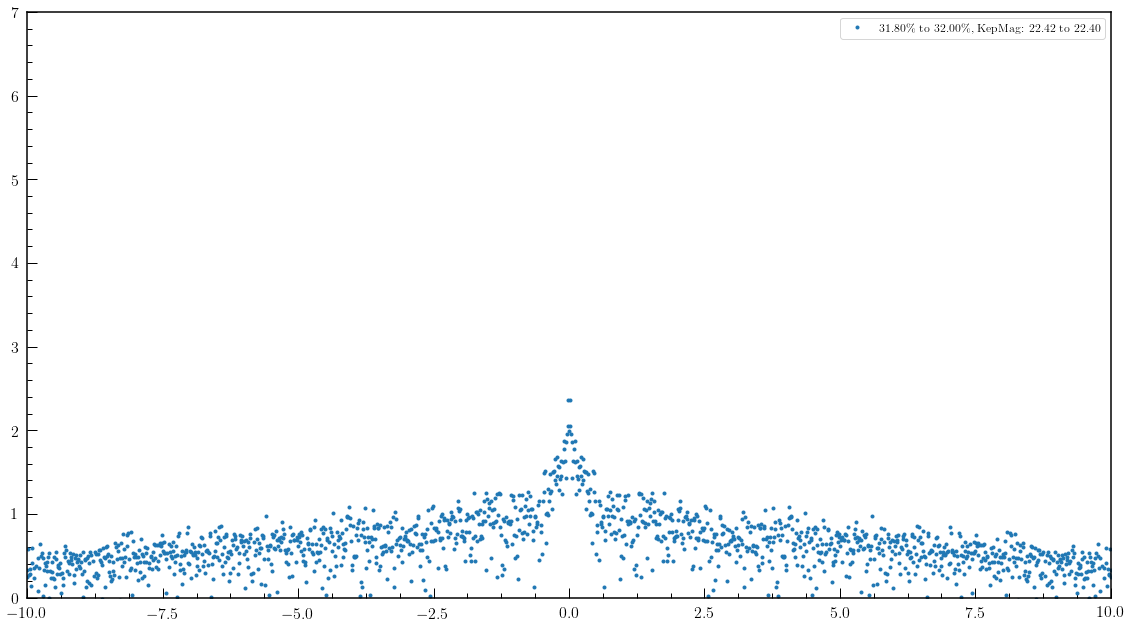

In [2180]:
from matplotlib.animation import FuncAnimation

class MakeFFTAnimation:
    
    def __init__(self, figure, *args, **kwargs):
        
        self.figure = figure
        self.axes = figure.axes[0]
        
        self.line, = self.axes.plot([0],[0], *args, **kwargs)
        self.axes.set_xlim(-10,10)
        self.axes.set_ylim(0,7)
        self.figure.tight_layout()
        
        self.fft_args = []
        
    def get_ffts(self):
        
        return np.array(zip(*[item[:2] for item in self.fft_args]))
        
    def clean_up(self):
        
        fft_arg_dict = {label:(freqs, fft) for freqs, fft, label in self.fft_args}
        self.fft_args = [[freqs, fft, label] for label, (freqs, fft) in fft_arg_dict.iteritems()]
        self.fft_args = sorted(self.fft_args, key=lambda x: float(x[2][0:x[2].find('%')-1]))
        
    def make_animation(self, args):
        
        frames = [self.get_fft(arg) for arg in args]
        anim = FuncAnimation(self.figure, self.fft_animation, frames, interval=25)
        return anim

    def get_fft(self, arg):

        t, y, label, stat = arg
        y = runningMean(y, N=4)
        t0 = np.nanmean(t[1:] - t[:-1])

        freqs_ = np.fft.fftfreq(len(y), t0)
        fft_ = np.fft.fft(y)
        
        self.fft_args.append([freqs_, fft_, label])
        
        fft = np.log10(np.absolute(np.fft.fft(y)))
        freqs, fft = map(np.fft.fftshift, (freqs_, fft))

        return freqs, fft, label

    def fft_animation(self, frame_arg):

        freqs, fft, label = frame_arg
        self.line.set_data(freqs, fft)
        self.axes.legend([self.line],[label])
        
        return self.line,
    
args = make_pixel_lc(lc, percentiles, diff=False, stat='mean')

fig, ax = subplots(1,1, figsize=(16,9))
anim_maker = MakeFFTAnimation(fig, ls=' ', marker='.')
anim = anim_maker.make_animation(args)
HTML(anim.to_html5_video())

In [ ]:
#anim_maker.clean_up()
freq, fft_data = zip(*[arg[:2] for arg in anim_maker.fft_args])
mf = []
for freq, fft, label in anim_maker.fft_args:
    max_freq = freq[np.argmax(fft)]
    if max_freq:
        mf.append(max_freq)
        print "{}: {}".format(label, np.abs(2*np.pi/max_freq))
        
mf = np.array(mf)

print 2*np.pi/np.median(np.abs(mf))


In [ ]:
data = ax.lines[-1].get_ydata()
fft = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), t[1]-t[0])

fft = np.fft.fftshift(fft)
freq = np.fft.fftshift(freq)

fig, ax2 = subplots(1,1)
ax2.scatter(freq, np.log10(np.abs(fft)), marker='.', s=1)

ax2.set_ylim(*np.sort(np.log10(np.abs(fft)))[[0,-1]])
ax2.set_xlim(-10,10)
print 1.0/freq[np.argsort(fft)[-2]]


In [ ]:
#rint fluxToMag(100)
#print pipeline.images[50];
fig, ax = subplots(1,1)
values = fluxToMag(pipeline.images[:,aperture].ravel())
corrected_values = fluxToMag(c_lc[:,aperture].ravel())

n_values = fluxToMag(pipeline.images[:,~aperture].ravel())
n_corrected_values = fluxToMag(c_lc[:,~aperture].ravel())

#n, bins, _ = ax.hist(values[~np.isnan(values)], bins=100, label='Total', normed=True);

#v1 = np.array([np.sum(image[~np.isnan(image) & (image < 500)]) for image in pipeline.images])

#v2 = np.array([np.sum(image[~np.isnan(image) & (image > 500)]) for image in pipeline.images])
#v2 = v2[v2 < 30000]

#v3 = np.array([np.sum(image[~np.isnan(image)]) for image in pipeline.images])
#v3 = v3[v3 < 30000]

n, bins, patches = ax.hist(values[~np.isnan(values)], bins=1000, label='Original', normed=True, histtype='step');
ax.hist(corrected_values[~np.isnan(corrected_values)], bins=bins, label='Corrected', normed=True, histtype='step');
n, bins, patches = ax.hist(n_values[~np.isnan(n_values)], bins=1000, label='!Original', normed=True, histtype='step');
ax.hist(n_corrected_values[~np.isnan(n_corrected_values)], bins=bins, label='!Corrected', normed=True, histtype='step');
#ax.axvline(14.59, color='k')
ax.axvline(23.5, color='k');

#ax.hist(v1, bins=1000, label='Less Than 500 e/s', normed=True, histtype='step');
#ax.hist(v2, bins=1000, label='Greater Than 500 e/s', normed=True, histtype='step');

#ax.hist(v3, bins=1000, label='All Cadences', normed=True, histtype='step');

ax.legend();
print np.nanmean(values)
print np.nanstd(values)
print np.nanmean(values)+np.nanstd(values), np.nanmean(values)-np.nanstd(values)
#ax.set_xlim(-2500,25000);

In [ ]:
print fluxToMag(100)
print pipeline.images[50]
fig, ax = subplots(1,1)
values = pipeline2.images.ravel()

n, bins, _ = ax.hist(values[~np.isnan(values)], bins=1000, label='Total', normed=True);

v1 = np.array([np.sum(image[~np.isnan(image) & (image < 100)]) for image in pipeline.images])

v2 = np.array([np.sum(image[~np.isnan(image) & (image > 100)]) for image in pipeline.images])
v2 = v2[v2 < 1200]

v3 = np.array([np.sum(image[~np.isnan(image)]) for image in pipeline.images])
v3 = v3[v3<1200]

ax.hist(v1, bins=100, label='Less Than 100 e/s', normed=True, histtype='step');
ax.hist(v2, bins=100, label='Greater Than 100 e/s', normed=True, histtype='step');

ax.hist(v3, bins=100, label='All Cadences', normed=True, histtype='step');

ax.legend()
ax.set_xlim(np.nanmin(v1),1000);

In [13]:
print magToFlux(18.49)
print fluxToMag(62.5)
print fluxToMag(200)
print magToFlux(21.3)
print len(pipeline.images.ravel())

441.112381707
20.6116730773
19.3487981315
33.1550164926
346770


In [30]:
magToFlux(16)

4370.682390826668

In [31]:
print np.nanmean(pipeline.images[:, pipeline2.aperture])
print np.nanmedian(pipeline.images[:, pipeline2.aperture])

NameError: name 'pipeline2' is not defined

In [ ]:
fluxToMag(5000)

In [12]:
N_AP = 0
N_TOT = 0
def get_sap_lcs(objs, ccd):
    
    urls = (get_lc_url(EPIC, campaign=ccd.campaign) for EPIC in objs)
    downloader = fits_downloader(urls)

    for i, hdu in enumerate(downloader):
        t = np.array(hdu['LIGHTCURVE'].data['TIME'])
        lc = np.array(hdu['LIGHTCURVE'].data['SAP_FLUX'])
        yield t, lc
        del hdu

            
def get_vj_lcs(objs, ccd):
    
    urls = (get_vj_url(EPIC, campaign=ccd.campaign) for EPIC in objs)
    downloader = fits_downloader(urls)

    for i, hdu in enumerate(downloader):
        t = np.array(hdu['BESTAPER'].data['T'])
        lc = np.array(hdu['BESTAPER'].data['FRAW'])
        best_aper = 'CIRC_APER_TBL' if hdu['BESTAPER'].header['MASKTYPE'] == 'CIRCULAR' else 'PRF_APER_TBL'
        best_idx = hdu['BESTAPER'].header['MASKINDE']
        aper = np.array(hdu[best_aper].data[best_idx])
        yield t, lc, aper
        del hdu

def get_target_pixels(objs, ccd):
    global N_AP, N_TOT
    urls = (get_target_pixel_url(EPIC, campaign=ccd.campaign) for EPIC in objs)
    downloader = fits_downloader(urls)


    with LoadingBar(True) as lb:
        for i, hdu in enumerate(downloader):
            t = np.array(hdu['TARGETTABLES'].data['TIME'])
            lc = np.array(hdu['TARGETTABLES'].data['FLUX'])
            aper = np.array(hdu['APERTURE'].data)
            yield t, lc, aper
            N_AP += len(np.where(aper==np.nanmax(aper))[0])
            N_TOT += lc[0].shape[0]*lc[1].shape[1]
            del hdu

class EPICObject(object):
    
    def __init__(self, *params):
        
        self.EPIC = []
        self.params = params
        self.__dict__.update({p:[] for p in params})
        self.params = ('EPIC',) + self.params
        self.EPIC_map = {}
        
    def append(self, *args):
        
        assert len(args) == len(self.params), \
            "Tried to add {} parameters but only {} available".format(*map(len,(args, self.params)))

        for a, p in zip(args, self.params):
            self.__dict__[p].append(a)
            
    def __getitem__(self, key):
        
        if type(key) is int:
            if key < 200000000:
                return [self.__dict__[p][key] for p in self.params]
            return self.EPIC_map[key]
        elif type(key) is slice:
            return [self[index] for index in xrange(*key.indices(len(self)))]

    def __setitem__(self, key, value):
        
        self[key][::] = value
        
    def update(self):
        
        self.EPIC_map = {self.EPIC[i]:[self.__dict__[p][i] for p in self.params[1:]] for i in xrange(len(self))}
        
    def __len__(self):
        
        return len(self.EPIC)

class EPICObjects:
    
    def __init__(self):
        
        self.vj = EPICObject('t', 'flux', 'aper')
        self.raw = EPICObject('t', 'pix', 'flux', 'aper')
        self.full = EPICObject('t','pix','sap_flux', 'sap_aper', 'vj_t', 'vj_flux', 'vj_aper')
        
    def update(self):
        
        self.vj.update()
        self.raw.update()
        self.full.update()
        
    def append(self, *args):
        
        self.full.append(*args)
        self.raw.append(*args[:5])
        self.vj.append(args[0], *args[5:])


def get_object_files(ccd, mask=None):
    
    object_filter = lambda x: x
    if mask is not None:
        if callable(mask):
            object_filter = lambda x: dict(filter(mask, x.iteritems()))
        else:
            object_filter = lambda x: dict(x.items()[mask])
    
    print "Finding Objects..."
    all_objs = getObjects(ccd)
    objs = object_filter(all_objs)
    epics = objs.keys()
    
    n_objs = len(epics)
    print "Downloading {} Light Curves...".format(n_objs)
    
    object_data = EPICObjects()
    data_iterator = [getter(epics, ccd) for getter in (get_sap_lcs, get_target_pixels, get_vj_lcs)]
    iterator = izip(epics, izip(*data_iterator))
    with LoadingBar(True) as lb:
        for i, (epic, ((t, lc), (_, pix, ap), (vj_t, vj_lc, vj_ap))) in enumerate(iterator):
            object_data.append(epic, t, pix, lc, ap, vj_t, vj_lc, vj_ap)
            lb.update_bar(1.0*i/n_objs)
        object_data.update()
    return object_data
    
def make_corrections(objects, lc):

    
    #try:
    #    cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
    #except KeyError:
    #    with LoadingBar(True) as bar:
    #        cont = PixelMapContainer(ccd, bar=bar)
    #        cont.save(pixmapfile, doc='Pixel values are represented by the \'FLUX\' data column of the K2 target pixel files')

    #gen = PixMapGenerator(cont)
    
    #print "Finding Objects..."
    #objs_ = getObjects(ccd)
    #objs = dict(filter(lambda x: x[1][0] > 1, objs_.iteritems()))
    #epics = objs.keys()
    
    #n_objs = len(epics)
    #print "Downloading {} Light Curves...".format(n_objs)
    # For now we do SAP flux, we'll do vj in a little bit
    #ts_lc, lcs_lc = get_sap_lcs(epics, ccd)
    #ts_vj, lcs_vj, aper_vj = get_vj_lcs(objs, ccd)
                         
    #print "Downloading All Target Pixels...\n"
    
    #ts_pix, lcs_pix, apers = get_target_pixels(epics, ccd)
    
    raw = objects.raw
    ts, lcs_lc = raw.t, objects.raw.flux
    lcs_pix, apers = raw.pix, raw.aper
       
    for p,a in zip(lcs_pix, apers):
        assert p.shape[1] == a.shape[0], "Aperture axis 0 has size {} while the image has size {}".format(a.shape[0], p.shape[1])
        assert p.shape[2] == a.shape[1], "Aperture axis 1 has size {} while the image has size {}".format(a.shape[1], p.shape[2])

    # now we correct everything
    c_lcs_pix = []
    aperture = None
    max_pix = np.inf
    min_pix = 0
    print "Correcting..."
    epics = raw.EPIC
    n_objs = len(epics)
    for i, EPIC in enumerate(epics):
        print "{}/{}".format(i, n_objs)
        c_lcs_pix.append(correct_target_pixels(EPIC, lc, aperture, max_pix=max_pix, min_pix=min_pix, smooth=0)[0])
        clear_output(wait=True)
    
    c_lcs = []
    print "Making LCs..."
    with LoadingBar(True) as lb:
        for i, (lcs_pix, aperture) in enumerate(zip(c_lcs_pix, apers)):
            ap = np.array(aperture >= np.max(aperture)).astype(np.bool)
            c_lcs.append(generate_lightcurve(lcs_pix, ap, mednorm=False, bkg_correct=False))
            lb.update_bar(1.0*i/n_objs)                         
    
    #print lcs
    print "Computing Means..."
    return lcs_lc, ts, c_lcs

   
def plot_means(lcs_lc, ts_lc, c_lcs):
   
    mean_t_lc = np.nanmean(ts_lc, axis=0)
    mean_lc_lc = np.nanmedian(lcs_lc, axis=0)

    mean_lc_c_lcs = np.nanmedian(c_lcs, axis=0)
    

    print "Plotting..."
    fig, ax = subplots(1,1, figsize=(16,9))
    smooth=120
    plotNiceIntervals(ax, mean_t_lc, mean_lc_lc, N=smooth, label = 'Median Original')
    plotNiceIntervals(ax, mean_t_lc, mean_lc_c_lcs, N=smooth, label = 'Median Corrected')
    plotNiceIntervals(ax, mean_t_lc, mean_lc_lc - mean_lc_c_lcs+np.nanmean(mean_lc_lc), N=smooth, label = 'Correction')
    ax.legend(fontsize=26, ncol=2)
    ax.axhline(np.nanmean(mean_lc_lc), color='r')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(26) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(26) 

    #ax.set_title("EPIC %i" % EPIC, fontsize=30)
    ax.set_ylabel('Flux $(e^{-}/s)$', fontsize=24)
    ax.set_xlabel('Time $(days)$', fontsize=24)
    m = np.nanmean(mean_lc_lc)
    s = np.nanstd(mean_lc_lc)*2
    ax.set_ylim(m-s,m+s)
    
    return ax




In [2]:
'''
ccd = CCD(module=6, channel=2, campaign=8, field='FLUX')
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen=PixMapGenerator(cont, cache=True)

percentiles = np.linspace(0, 100, 501)
print '\n'.join(map(lambda x: "{:3.4f}".format(x),percentiles[:5]))
print '----'
print '\n'.join(map(lambda x: "{:3.4f}".format(x),percentiles[-5:]))
lc = get_pixel_lc(gen, percentiles, mag_range=(-np.inf, np.inf)) #Star

''';


In [13]:
#objects = get_object_files(ccd, mask=lambda x: x[1][0] > 1)
print N_TOT
print N_AP
print 1.0*N_AP/N_TOT

Finding Objects...
[#-..........................................................] Estimating...    
[#/..........................................................] Estimating...    
[#/..........................................................] Estimating...    
[############################################################|] Estimating...   
31157
5209


In [448]:
pack_ = make_corrections(objects, lc)
ax = plot_means(*pack_)

2/369


KeyboardInterrupt: 

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:190: RuntimeWarning: Mean of empty slice


Plotting...


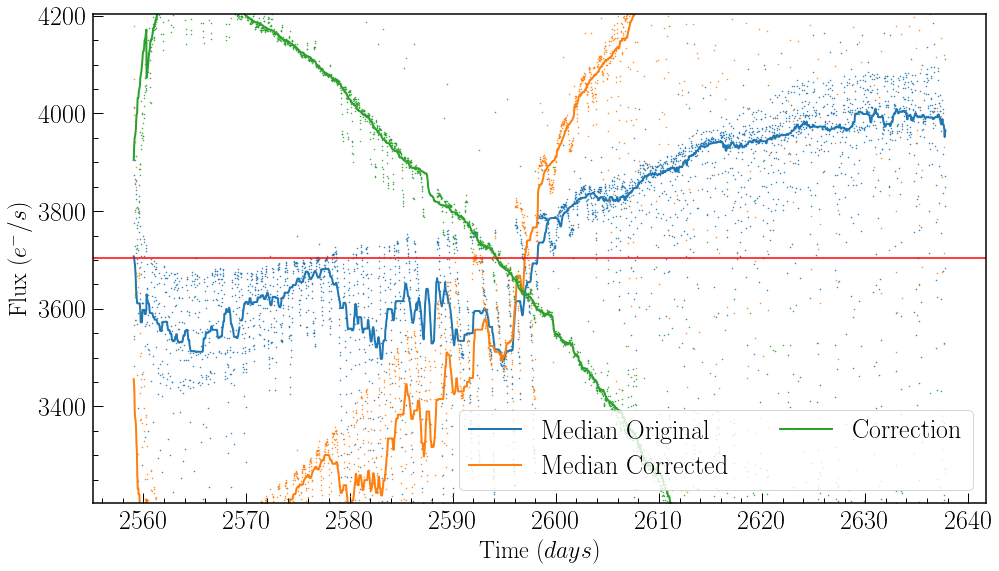

In [449]:

ax = plot_means(*pack_)#.set_ylim(124500,131000)
# Possible problems:
#    1. Overcorrection, should apply corrections from bins below rather than nearest, 
#      or guarantee that nearest is below the pixel
#    2. Use convolved percentiles when making weighted corrections to better fit objects
#    3. Try treating correction as a ratio rather than an additivie effect